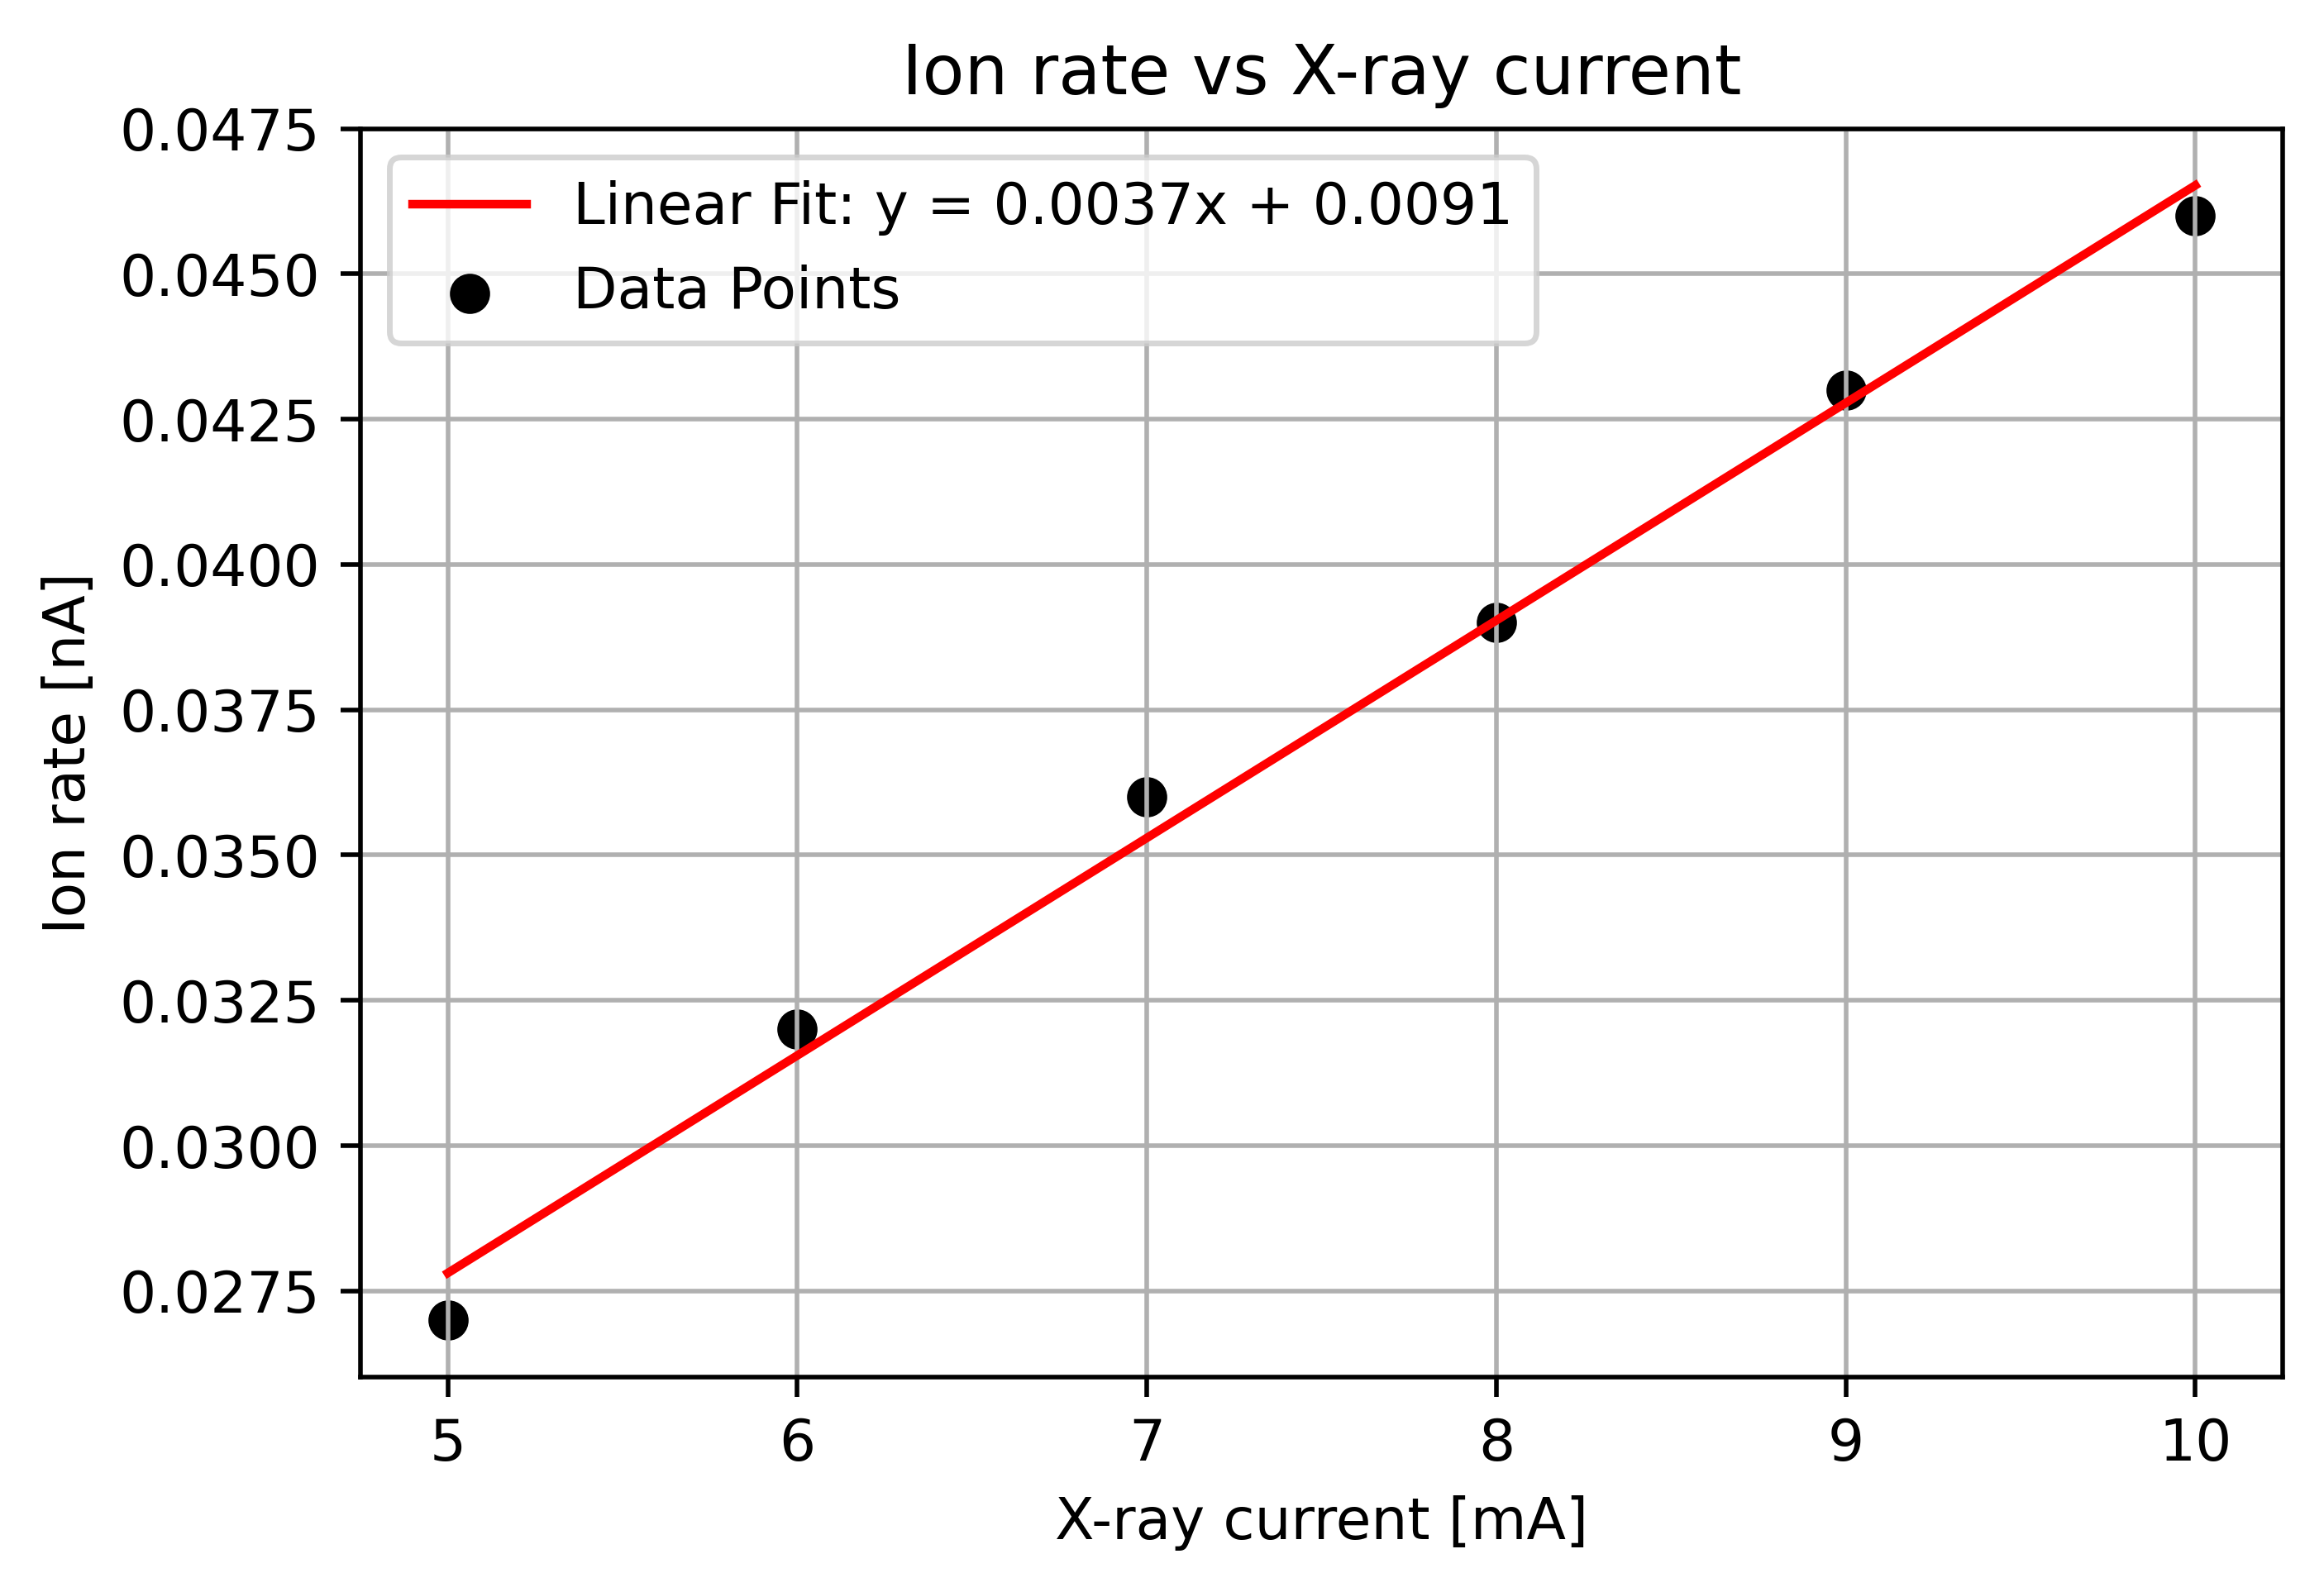

Slope: 0.0037, Intercept: 0.0091, R-squared: 0.9932


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import matplotlib as mpl; mpl.rcParams['figure.dpi'] = 500


# Data
i_in = np.array([5, 6, 7, 8, 9, 10])  # X-ray current (mA)
ion_rate = np.array([0.027, 0.032, 0.036, 0.039, 0.043, 0.046])  # Ion rate (nA)

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(i_in, ion_rate)

# Generate regression line
fitted_line = slope * i_in + intercept

# Plot data
plt.scatter(i_in, ion_rate, label='Data Points', color='black')
plt.plot(i_in, fitted_line, label=f'Linear Fit: y = {slope:.4f}x + {intercept:.4f}', color='red')

# Formatting
plt.xlabel('X-ray current [mA]')
plt.ylabel('Ion rate [nA]')
plt.title('Ion rate vs X-ray current')
plt.legend()
plt.grid()
plt.savefig("a regression")

# Display
plt.show()

# Output regression stats
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R-squared: {r_value**2:.4f}")


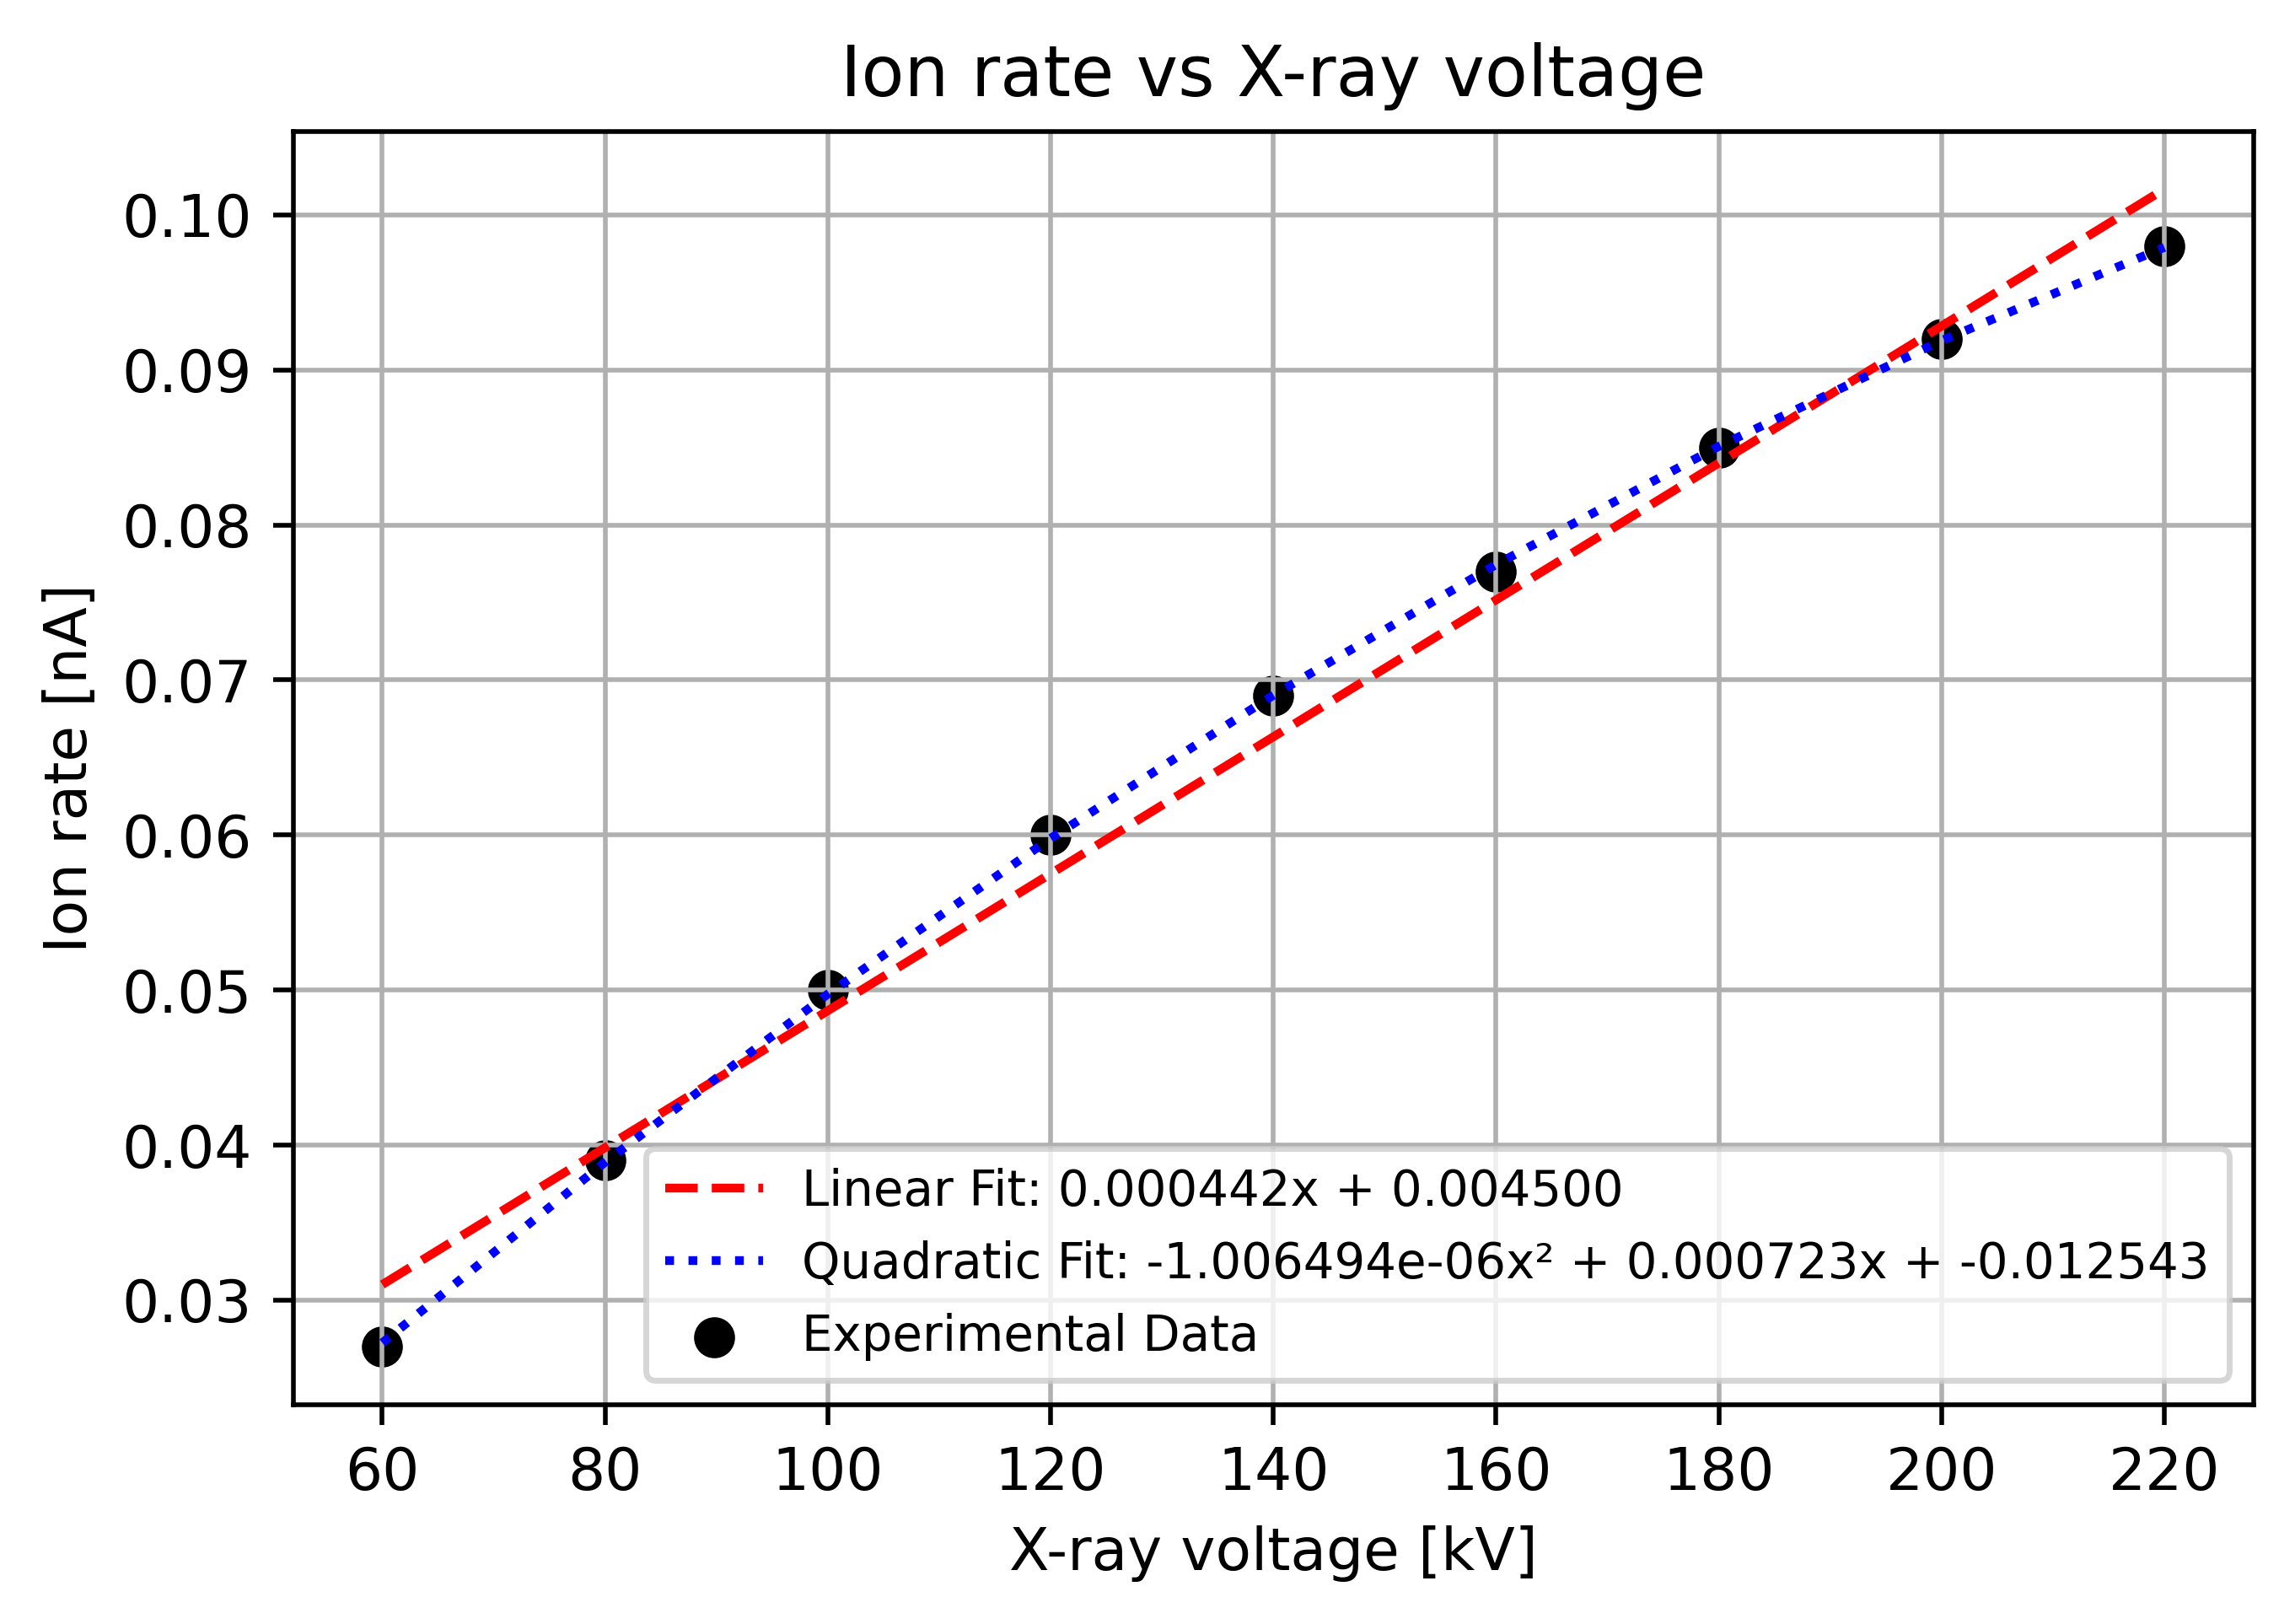

0.9893632009016624 0.9999130905724313


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

# Data
u_in = np.array([60, 80, 100, 120, 140, 160, 180, 200, 220])  # X-ray voltage (kV)
ion_rate_voltage = np.array([0.027, 0.039, 0.05, 0.06, 0.069, 0.077, 0.085, 0.092, 0.098])  # Ion rate (nA)

# Linear regression
linear_model = LinearRegression()
u_in_reshaped = u_in.reshape(-1, 1)  # Reshape for sklearn
linear_model.fit(u_in_reshaped, ion_rate_voltage)
linear_fit = linear_model.predict(u_in_reshaped)

# Quadratic fit function
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Fit quadratic
params, _ = curve_fit(quadratic, u_in, ion_rate_voltage)
quadratic_fit = quadratic(u_in, *params)

# Plot
plt.scatter(u_in, ion_rate_voltage, label='Experimental Data', color='black')
plt.plot(u_in, linear_fit, label=f'Linear Fit: {linear_model.coef_[0]:.6f}x + {linear_model.intercept_:.6f}', color='red', linestyle='--')
plt.plot(u_in, quadratic_fit, label=f'Quadratic Fit: {params[0]:.6e}x² + {params[1]:.6f}x + {params[2]:.6f}', color='blue', linestyle=':')

# Formatting
plt.xlabel('X-ray voltage [kV]')
plt.ylabel('Ion rate [nA]')
plt.title('Ion rate vs X-ray voltage')
plt.legend(fontsize = "small")
plt.grid()
plt.savefig("b voltage")

# Display
plt.show()

# R² for linear regression
r2_linear = linear_model.score(u_in_reshaped, ion_rate_voltage)

# R² for quadratic fit
residuals = ion_rate_voltage - quadratic_fit
ss_res = np.sum(residuals**2)  # Residual sum of squares
ss_tot = np.sum((ion_rate_voltage - np.mean(ion_rate_voltage))**2)  # Total sum of squares
r2_quadratic = 1 - (ss_res / ss_tot)

print(r2_linear, r2_quadratic)


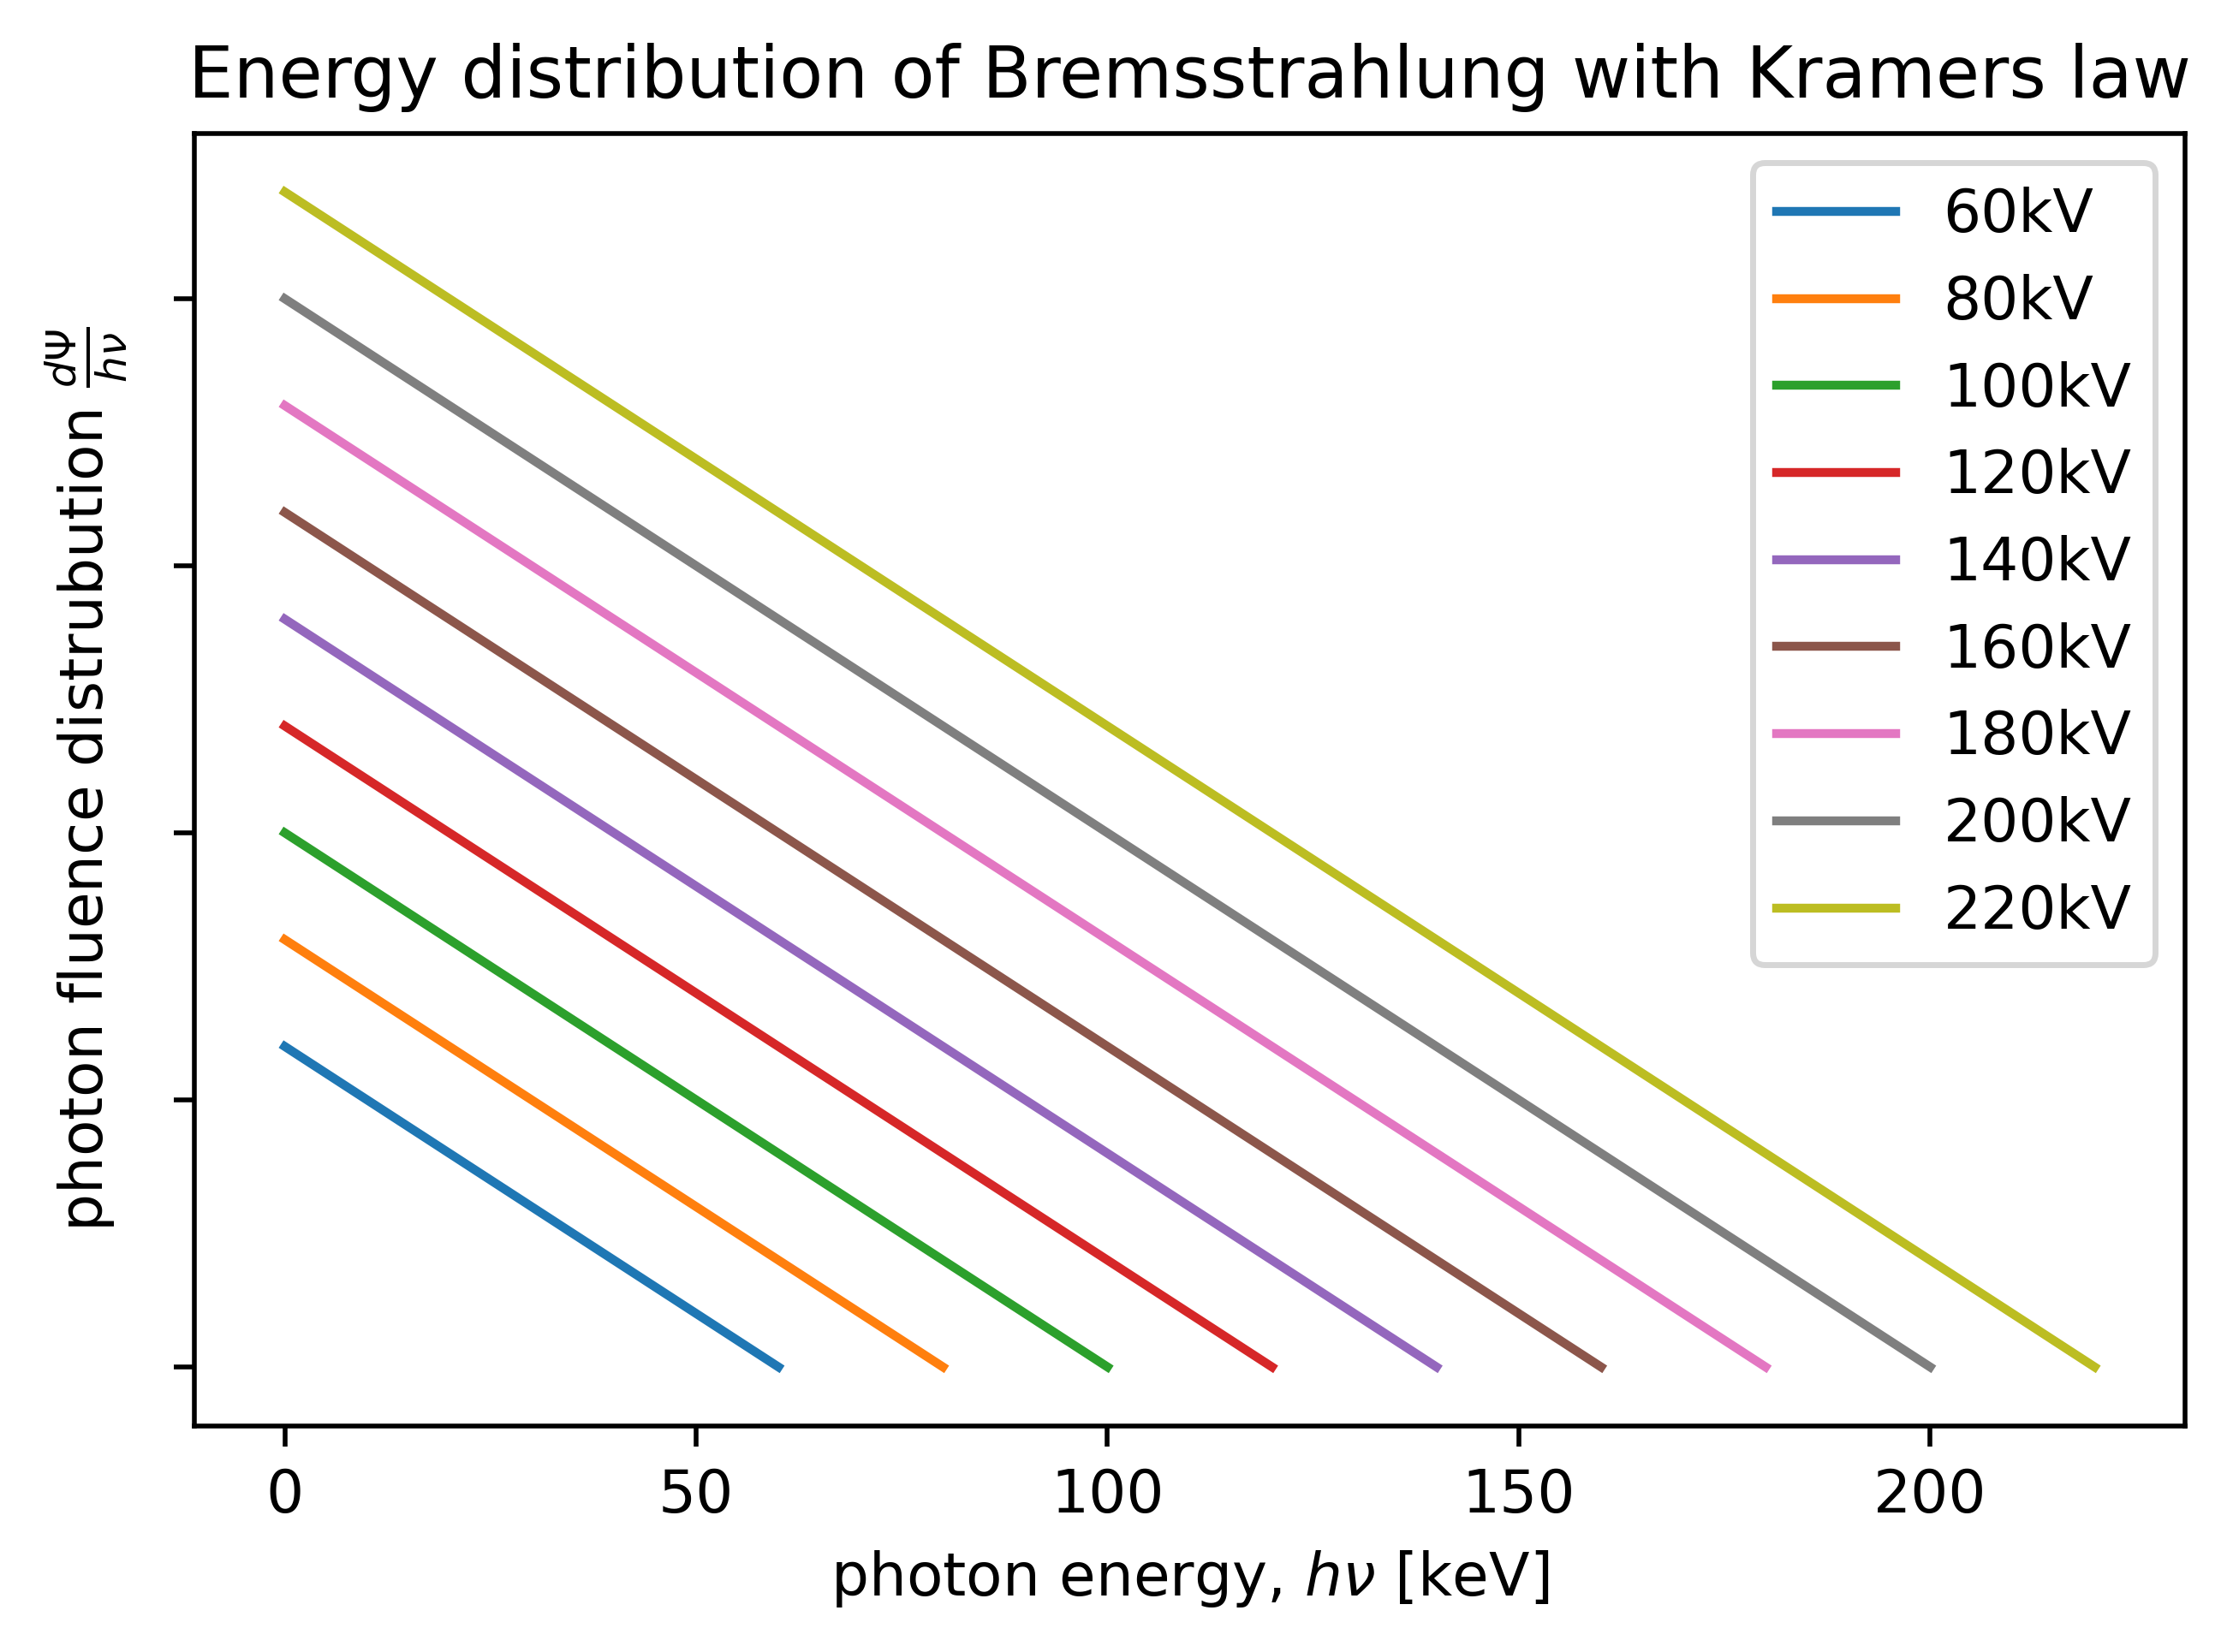

In [45]:
def kramer(Ve, hv):
    return Ve - hv

for i in range(9):
    V = 60 + 20*i
    hv = np.linspace(0,V,1000)
    
    plt.plot(hv,kramer(V, hv), label = f"{V}kV" )
plt.legend()

plt.xlabel(r"photon energy, $h\nu$ [keV]")
plt.ylabel(r"photon fluence distrubution $\frac{d\Psi}{h\nu}$")
plt.title("Energy distribution of Bremsstrahlung with Kramers law")
plt.gca().set_yticklabels([])
plt.savefig("kramer bad bitches")

# b) 

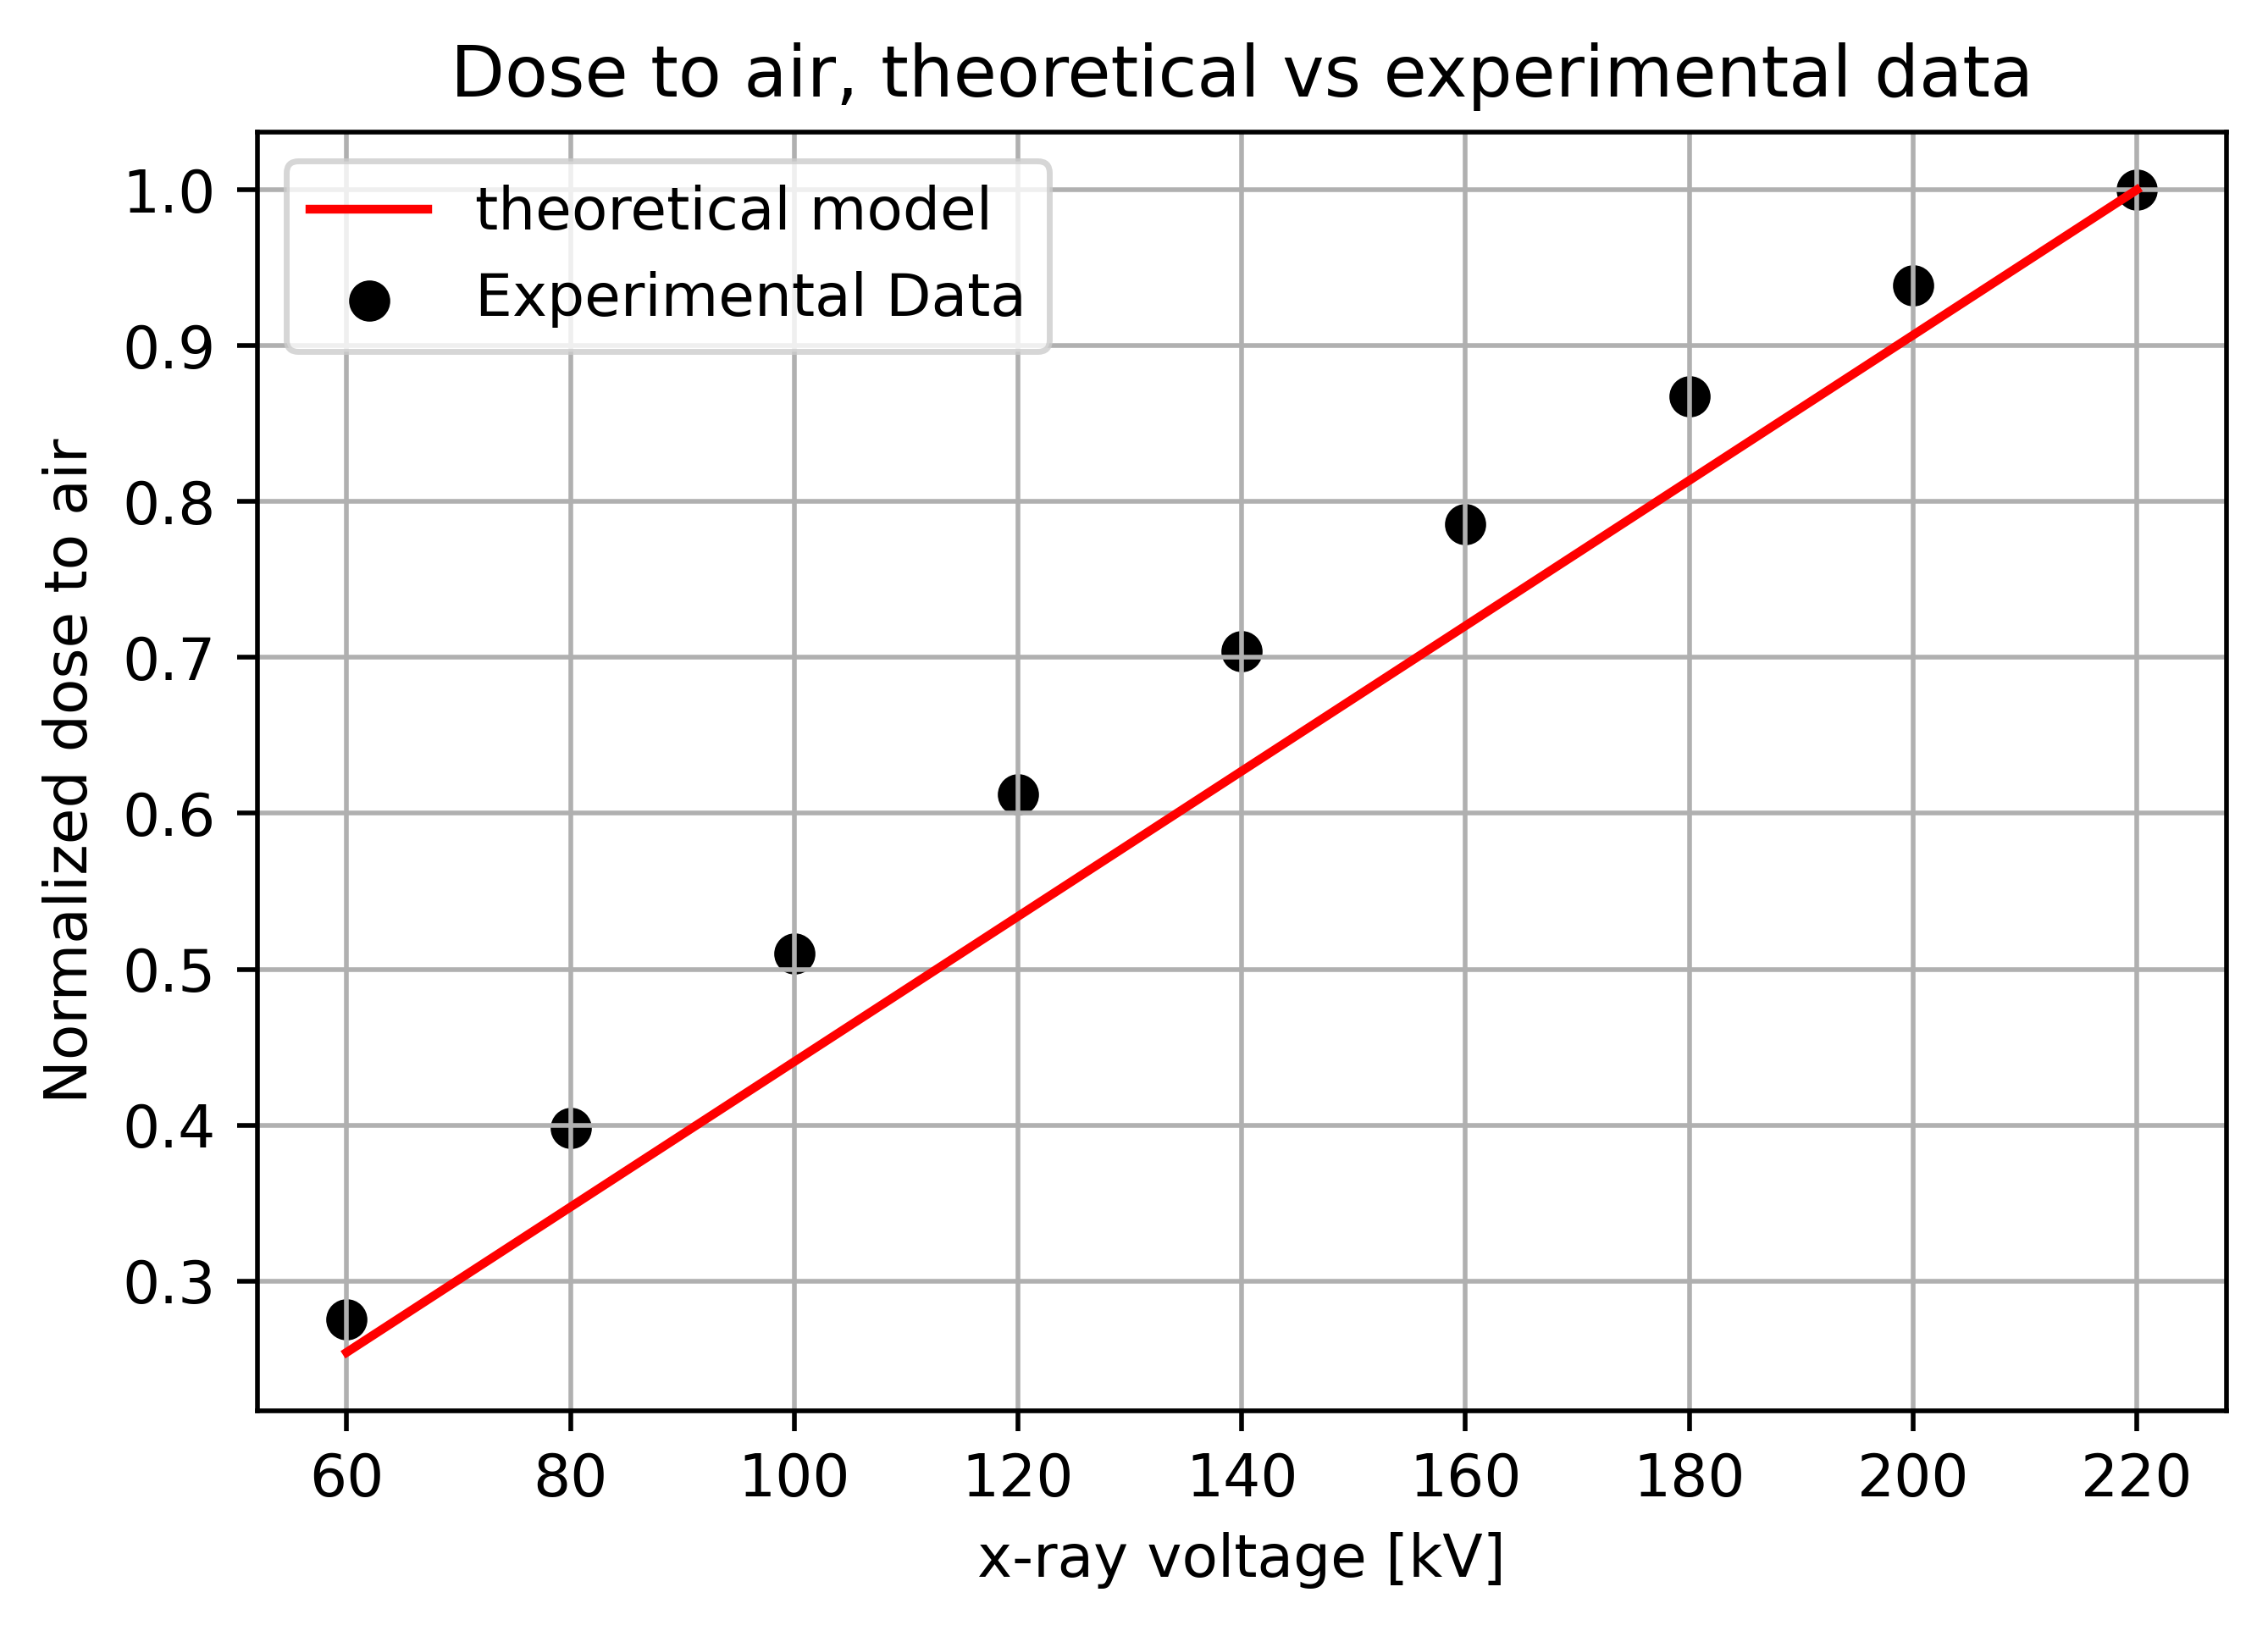

In [54]:

#table values: 

#energies from NIST
E_table = [1.00000E-03, 1.50000E-03, 2.00000E-03, 3.00000E-03, 4.00000E-03, 
 5.00000E-03, 6.00000E-03, 8.00000E-03, 1.00000E-02, 1.50000E-02, 2.00000E-02, 3.00000E-02, 
 4.00000E-02, 5.00000E-02, 6.00000E-02, 8.00000E-02, 1.00000E-01, 1.50000E-01, 2.00000E-01, 
 3.00000E-01, 4.00000E-01, 5.00000E-01, 6.00000E-01, 8.00000E-01, 1.00000E+00, 1.25000E+00, 
 1.50000E+00, 2.00000E+00, 3.00000E+00, 4.00000E+00, 5.00000E+00, 6.00000E+00, 8.00000E+00, 
 1.00000E+01, 1.50000E+01, 2.00000E+01]

#mass attenuation for air NISt
mr_table = [3599.0, 1188.0, 526.2, 161.4, 76.36, 39.31, 22.70, 9.45, 4.742, 1.334, 0.5389, 
 0.1537, 0.06833, 0.04098, 0.03041, 0.02407, 0.02325, 0.02496, 0.02672, 0.02872, 0.02949, 0.02966, 
 0.02953, 0.02882, 0.02789, 0.02666, 0.02547, 0.02345, 0.02057, 0.01870, 0.01740, 0.01647, 0.01525, 
 0.01450, 0.01353, 0.01311]


#aluminium mass attenuation from NIST
al_table = [1.185E+03, 4.022E+02, 2.263E+03, 7.880E+02, 3.605E+02, 1.934E+02, 1.153E+02, 
    5.033E+01, 2.623E+01, 7.955E+00, 3.441E+00, 1.128E+00, 5.685E-01, 3.681E-01, 
    2.778E-01, 2.018E-01, 1.704E-01, 1.378E-01, 1.223E-01, 1.042E-01, 9.276E-02, 
    8.445E-02, 7.802E-02, 6.841E-02, 6.146E-02, 5.496E-02, 5.006E-02, 4.324E-02, 
    3.541E-02, 3.106E-02, 2.836E-02, 2.655E-02, 2.437E-02, 2.318E-02, 2.195E-02, 
    2.168E-02] #cm^2/g

r_al = 2.699 #density of aluminium [g/cm^3]

def kramer(Ve, hv):
    return Ve - hv

D = np.zeros(100)
V = np.linspace(60,220,100)

for j in range(100):
    D_count = 0
    for i in range(len(E_table)-2):  
        if E_table[i] < V[j]: 
            dE = E_table[i+1] - E_table[i]
            attenuation = np.exp(-0.15 * al_table[i] * r_al)

            D_count += kramer(V[j],E_table[i])*mr_table[i]*dE*attenuation
    D[j] = D_count

    
plt.plot(V,D/np.max(D), color = "red", label = "theoretical model")
plt.scatter(u_in, ion_rate_voltage/max(ion_rate_voltage), label='Experimental Data', color='black')
plt.title("Dose to air, theoretical vs experimental data")
plt.grid()
plt.xlabel("x-ray voltage [kV]")
plt.ylabel("Normalized dose to air")
plt.legend()
plt.savefig("Dose to air")



In [55]:
print(len(E_table), len(mr_table), len(al_table))

36 36 36


# c) 

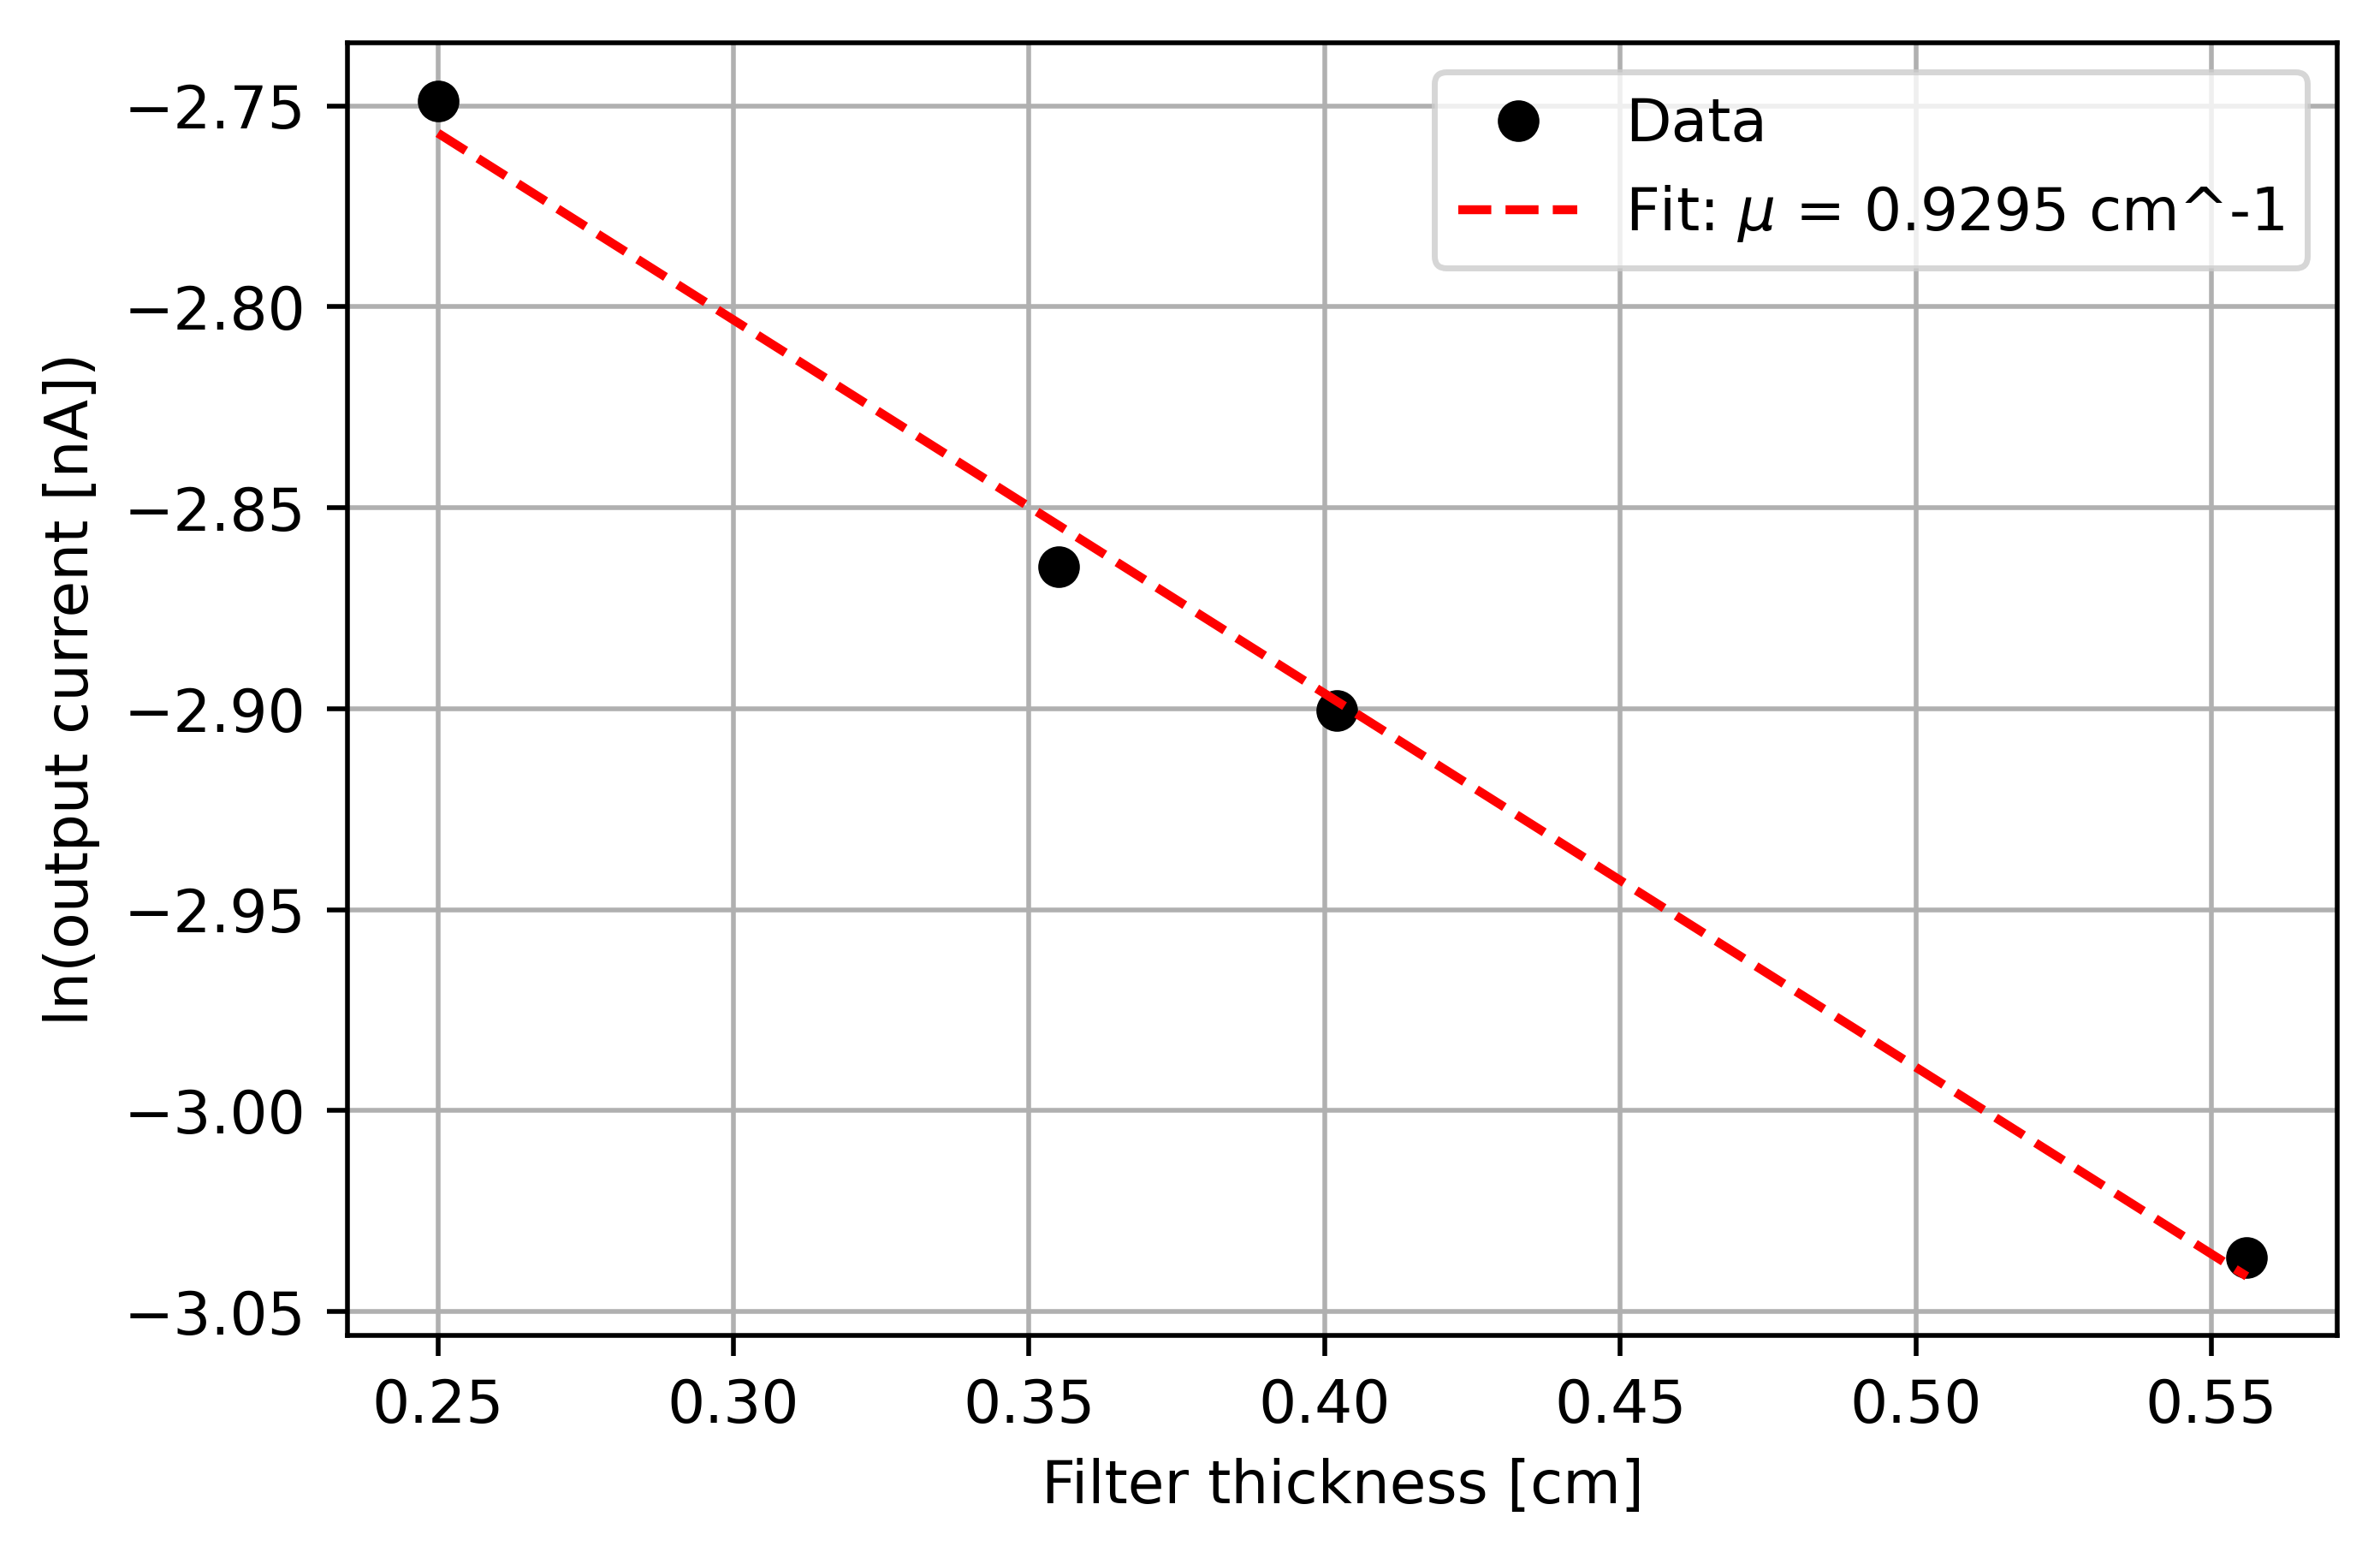

Extrapolated I0 (no filter): 0.0801 nA
Linear attenuation coefficient (mu): 0.9295 cm^-1
Mass attenuation coefficient (mu/rho): 0.3443 cm^2/g


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Data
thickness_mm = np.array([2.5, 3.55, 4.02, 5.56])  # Filter thickness in mm
thickness_cm = thickness_mm * 0.1  # Convert to cm
I_out = np.array([0.064, 0.057, 0.055, 0.048])  # Output current in nA

ln_I_out = np.log(I_out)

# Perform linear fit of ln(I_out) vs thickness to extrapolate ln(I0)
coeffs = np.polyfit(thickness_cm, ln_I_out, 1)
ln_I0 = coeffs[1]  # Intercept of the fit (ln(I0))
I0 = np.exp(ln_I0)  # Convert back to linear scale


mu = -coeffs[0]  # Slope is -mu

# Calculate mass attenuation coefficient
mu_over_rho = mu / r_al

# Plotting
plt.plot(thickness_cm, ln_I_out, 'o', label="Data", color="black")
plt.plot(thickness_cm, np.polyval(coeffs, thickness_cm), linestyle="dashed", color="red",
         label=f"Fit: $\mu$ = {mu:.4f} cm^-1")
plt.xlabel("Filter thickness [cm]")
plt.ylabel("ln(output current [nA])")
plt.title("")
plt.grid()
plt.legend()
plt.savefig("semi-log attenuation")
plt.show()

# Print results
print(f"Extrapolated I0 (no filter): {I0:.4f} nA")
print(f"Linear attenuation coefficient (mu): {mu:.4f} cm^-1")
print(f"Mass attenuation coefficient (mu/rho): {mu_over_rho:.4f} cm^2/g")



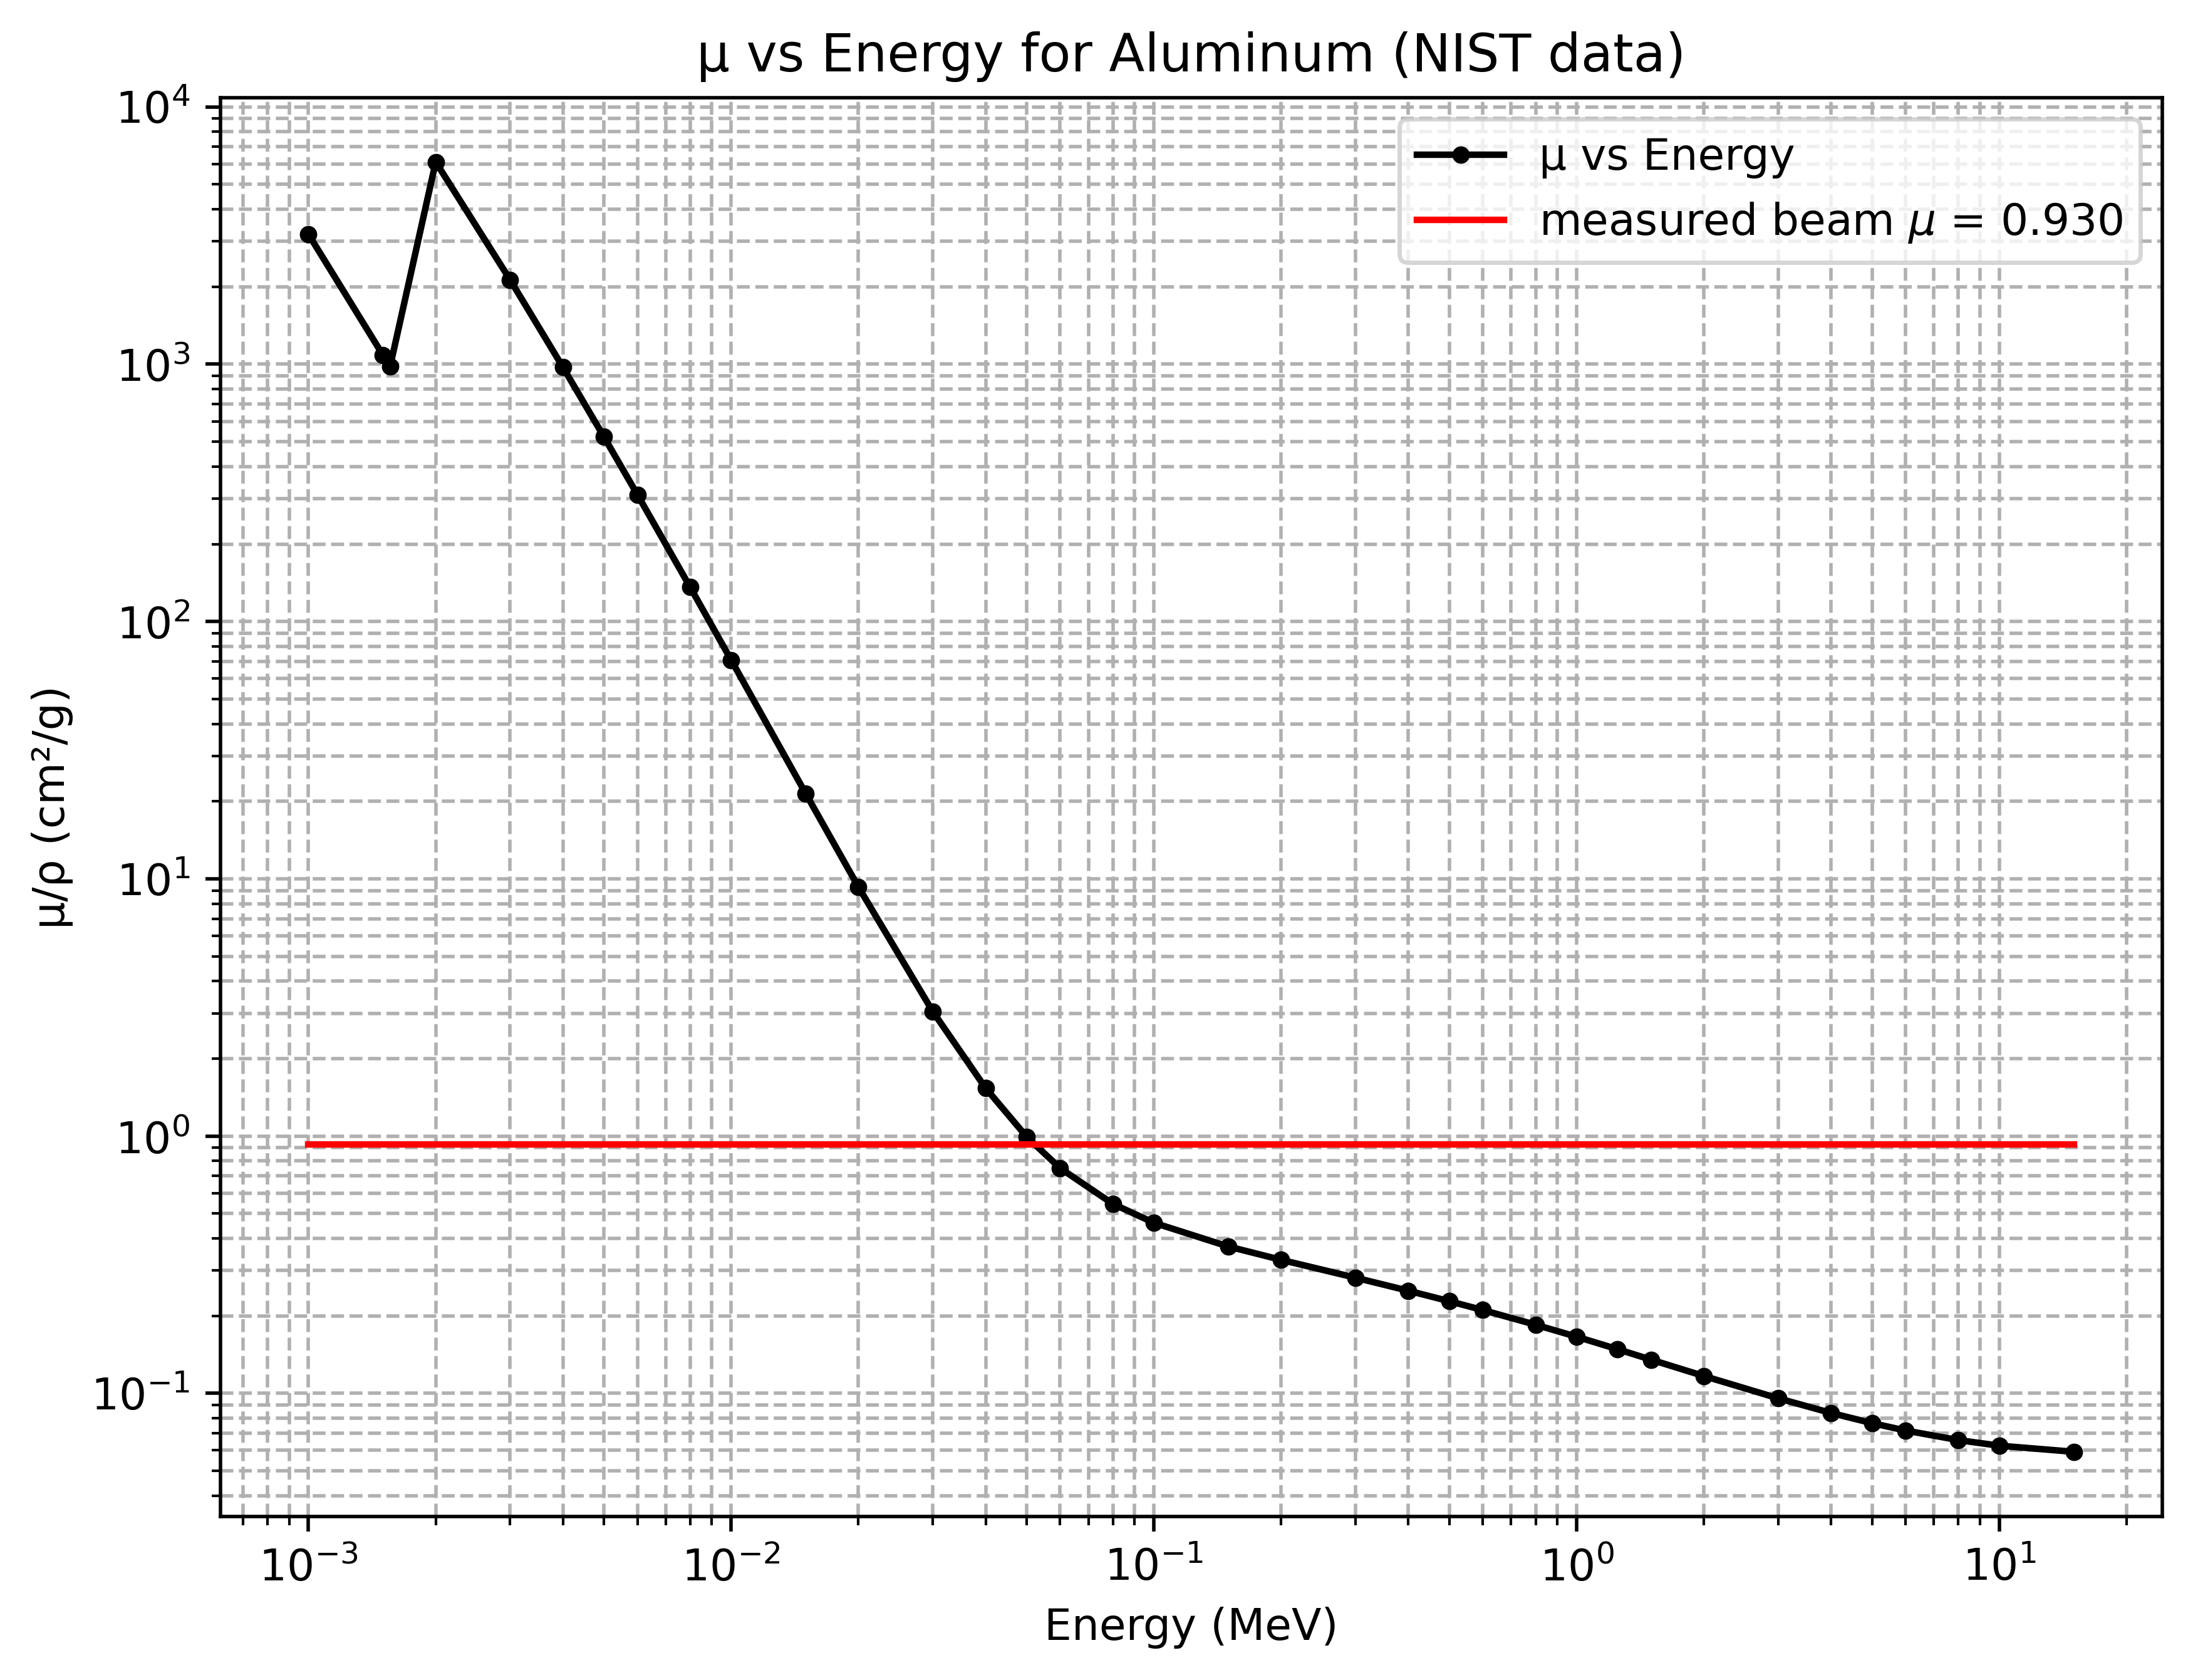

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Energy (MeV) and μ/ρ (cm^2/g) data
energy = np.array([1.00000E-03, 1.50000E-03, 1.55960E-03, 2.00000E-03, 3.00000E-03, 4.00000E-03, 5.00000E-03,
                   6.00000E-03, 8.00000E-03, 1.00000E-02, 1.50000E-02, 2.00000E-02, 3.00000E-02, 4.00000E-02,
                   5.00000E-02, 6.00000E-02, 8.00000E-02, 1.00000E-01, 1.50000E-01, 2.00000E-01, 3.00000E-01,
                   4.00000E-01, 5.00000E-01, 6.00000E-01, 8.00000E-01, 1.00000E+00, 1.25000E+00, 1.50000E+00,
                   2.00000E+00, 3.00000E+00, 4.00000E+00, 5.00000E+00, 6.00000E+00, 8.00000E+00, 1.00000E+01,
                   1.50000E+01])

mu_rho = np.array([1.185E+03, 4.022E+02, 3.621E+02, 2.263E+03, 7.880E+02, 3.605E+02, 1.934E+02, 1.153E+02,
                   5.033E+01, 2.623E+01, 7.955E+00, 3.441E+00, 1.128E+00, 5.685E-01, 3.681E-01, 2.778E-01,
                   2.018E-01, 1.704E-01, 1.378E-01, 1.223E-01, 1.042E-01, 9.276E-02, 8.445E-02, 7.802E-02,
                   6.841E-02, 6.146E-02, 5.496E-02, 5.006E-02, 4.324E-02, 3.541E-02, 3.106E-02, 2.836E-02,
                   2.655E-02, 2.437E-02, 2.318E-02, 2.195E-02])

# Plotting μ/ρ vs Energy
plt.figure(figsize=(8, 6))
plt.plot(energy, mu_rho*r_al, linestyle='-', marker = ".", color='black', label="μ vs Energy")
plt.plot(energy,np.full(len(energy),0.930), label = f"measured beam $\mu$ = 0.930", color = "red")
plt.xscale('log')
plt.yscale('log')  
plt.xlabel("Energy (MeV)")
plt.ylabel("μ/ρ (cm²/g)")
plt.title("μ vs Energy for Aluminum (NIST data)")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.savefig("NIST attenuation")
plt.show()


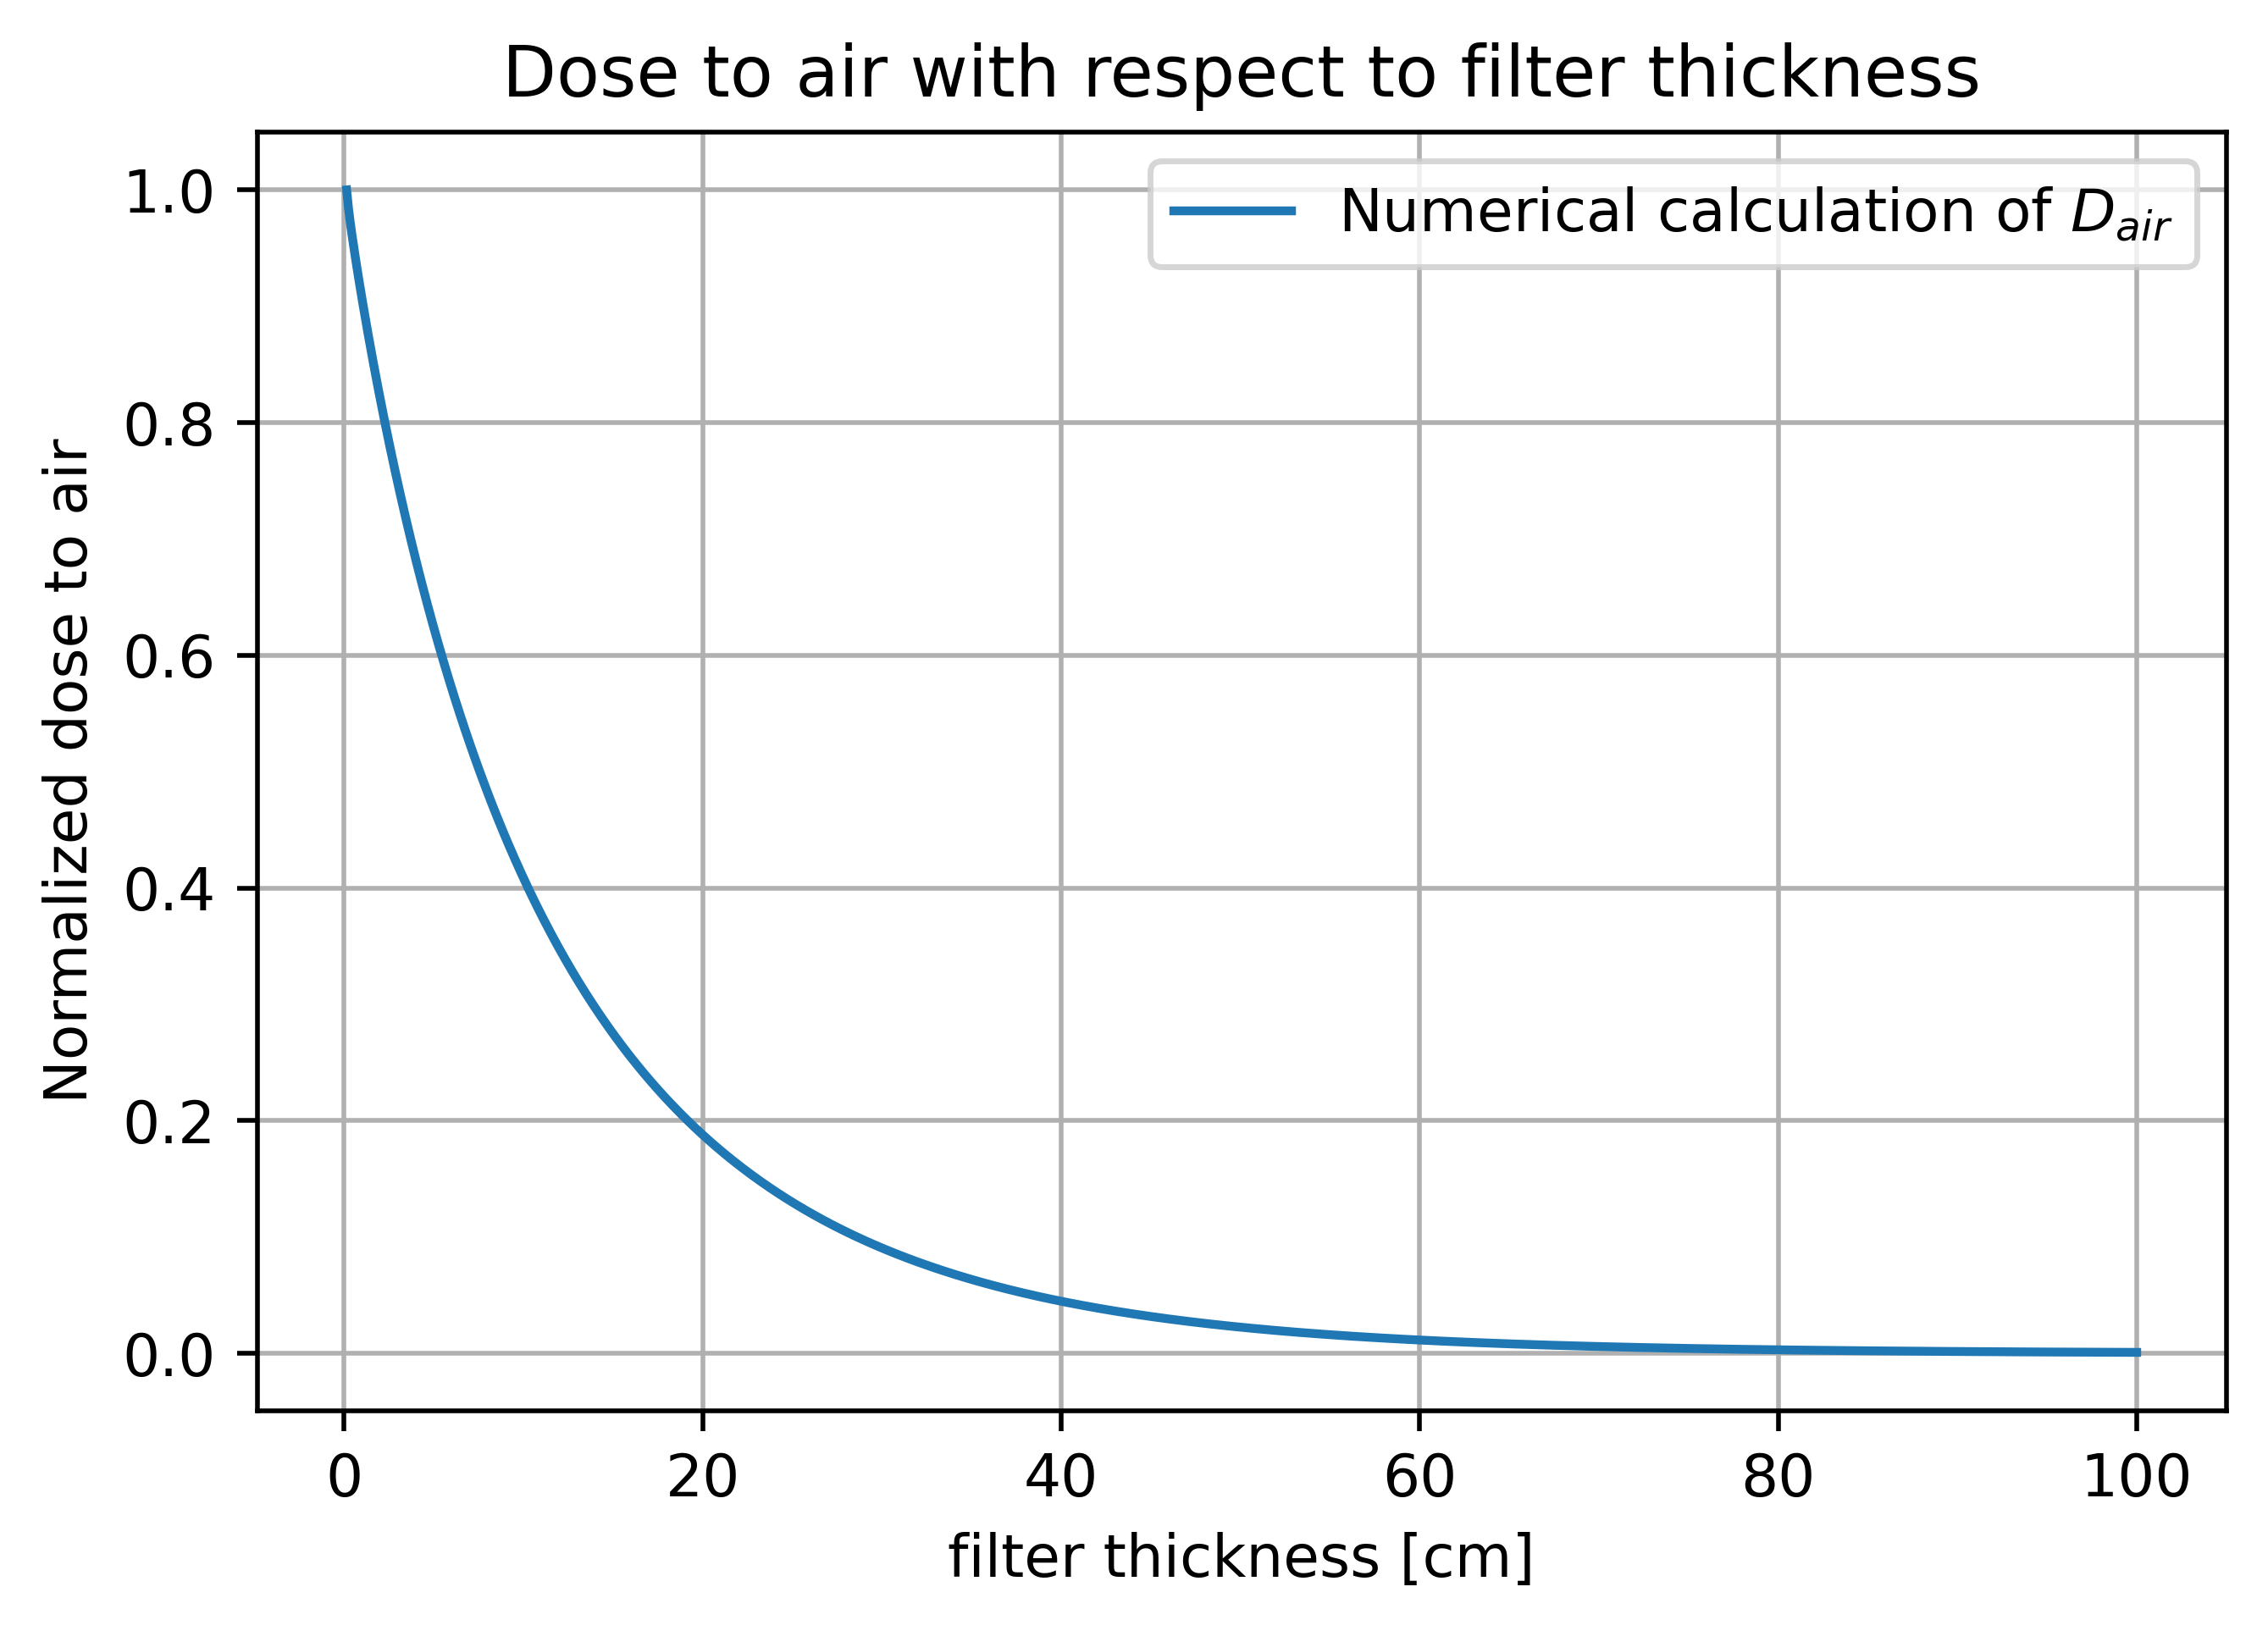

In [64]:
D2 = np.zeros(1000) 
V2 = 150  # Maximum photon energy in keV
x = np.linspace(0.15, 100, 1000)  

r_al = 2.7

for j in range(1000):  # Loop over different thicknesses
    D_count = 0
    for i in range(len(E_table) - 2):  # Loop over energy steps
        if E_table[i] < V2:  # Only include photon energies below max energy
            D_count += (
                kramer(V2, E_table[i])  # Kramers spectrum
                * mr_table[i]  
                * (E_table[i+1] - E_table[i])
                * np.exp(-x[j] * al_table[i]*r_al))
    D2[j] = D_count  

plt.plot(x,D2/max(D2), label = "Numerical calculation of $D_{air}$")
plt.grid()
plt.xlabel("filter thickness [cm]")
plt.ylabel("Normalized dose to air")
plt.title("Dose to air with respect to filter thickness")
plt.legend()
plt.savefig("thickness, dose")

# task d) 

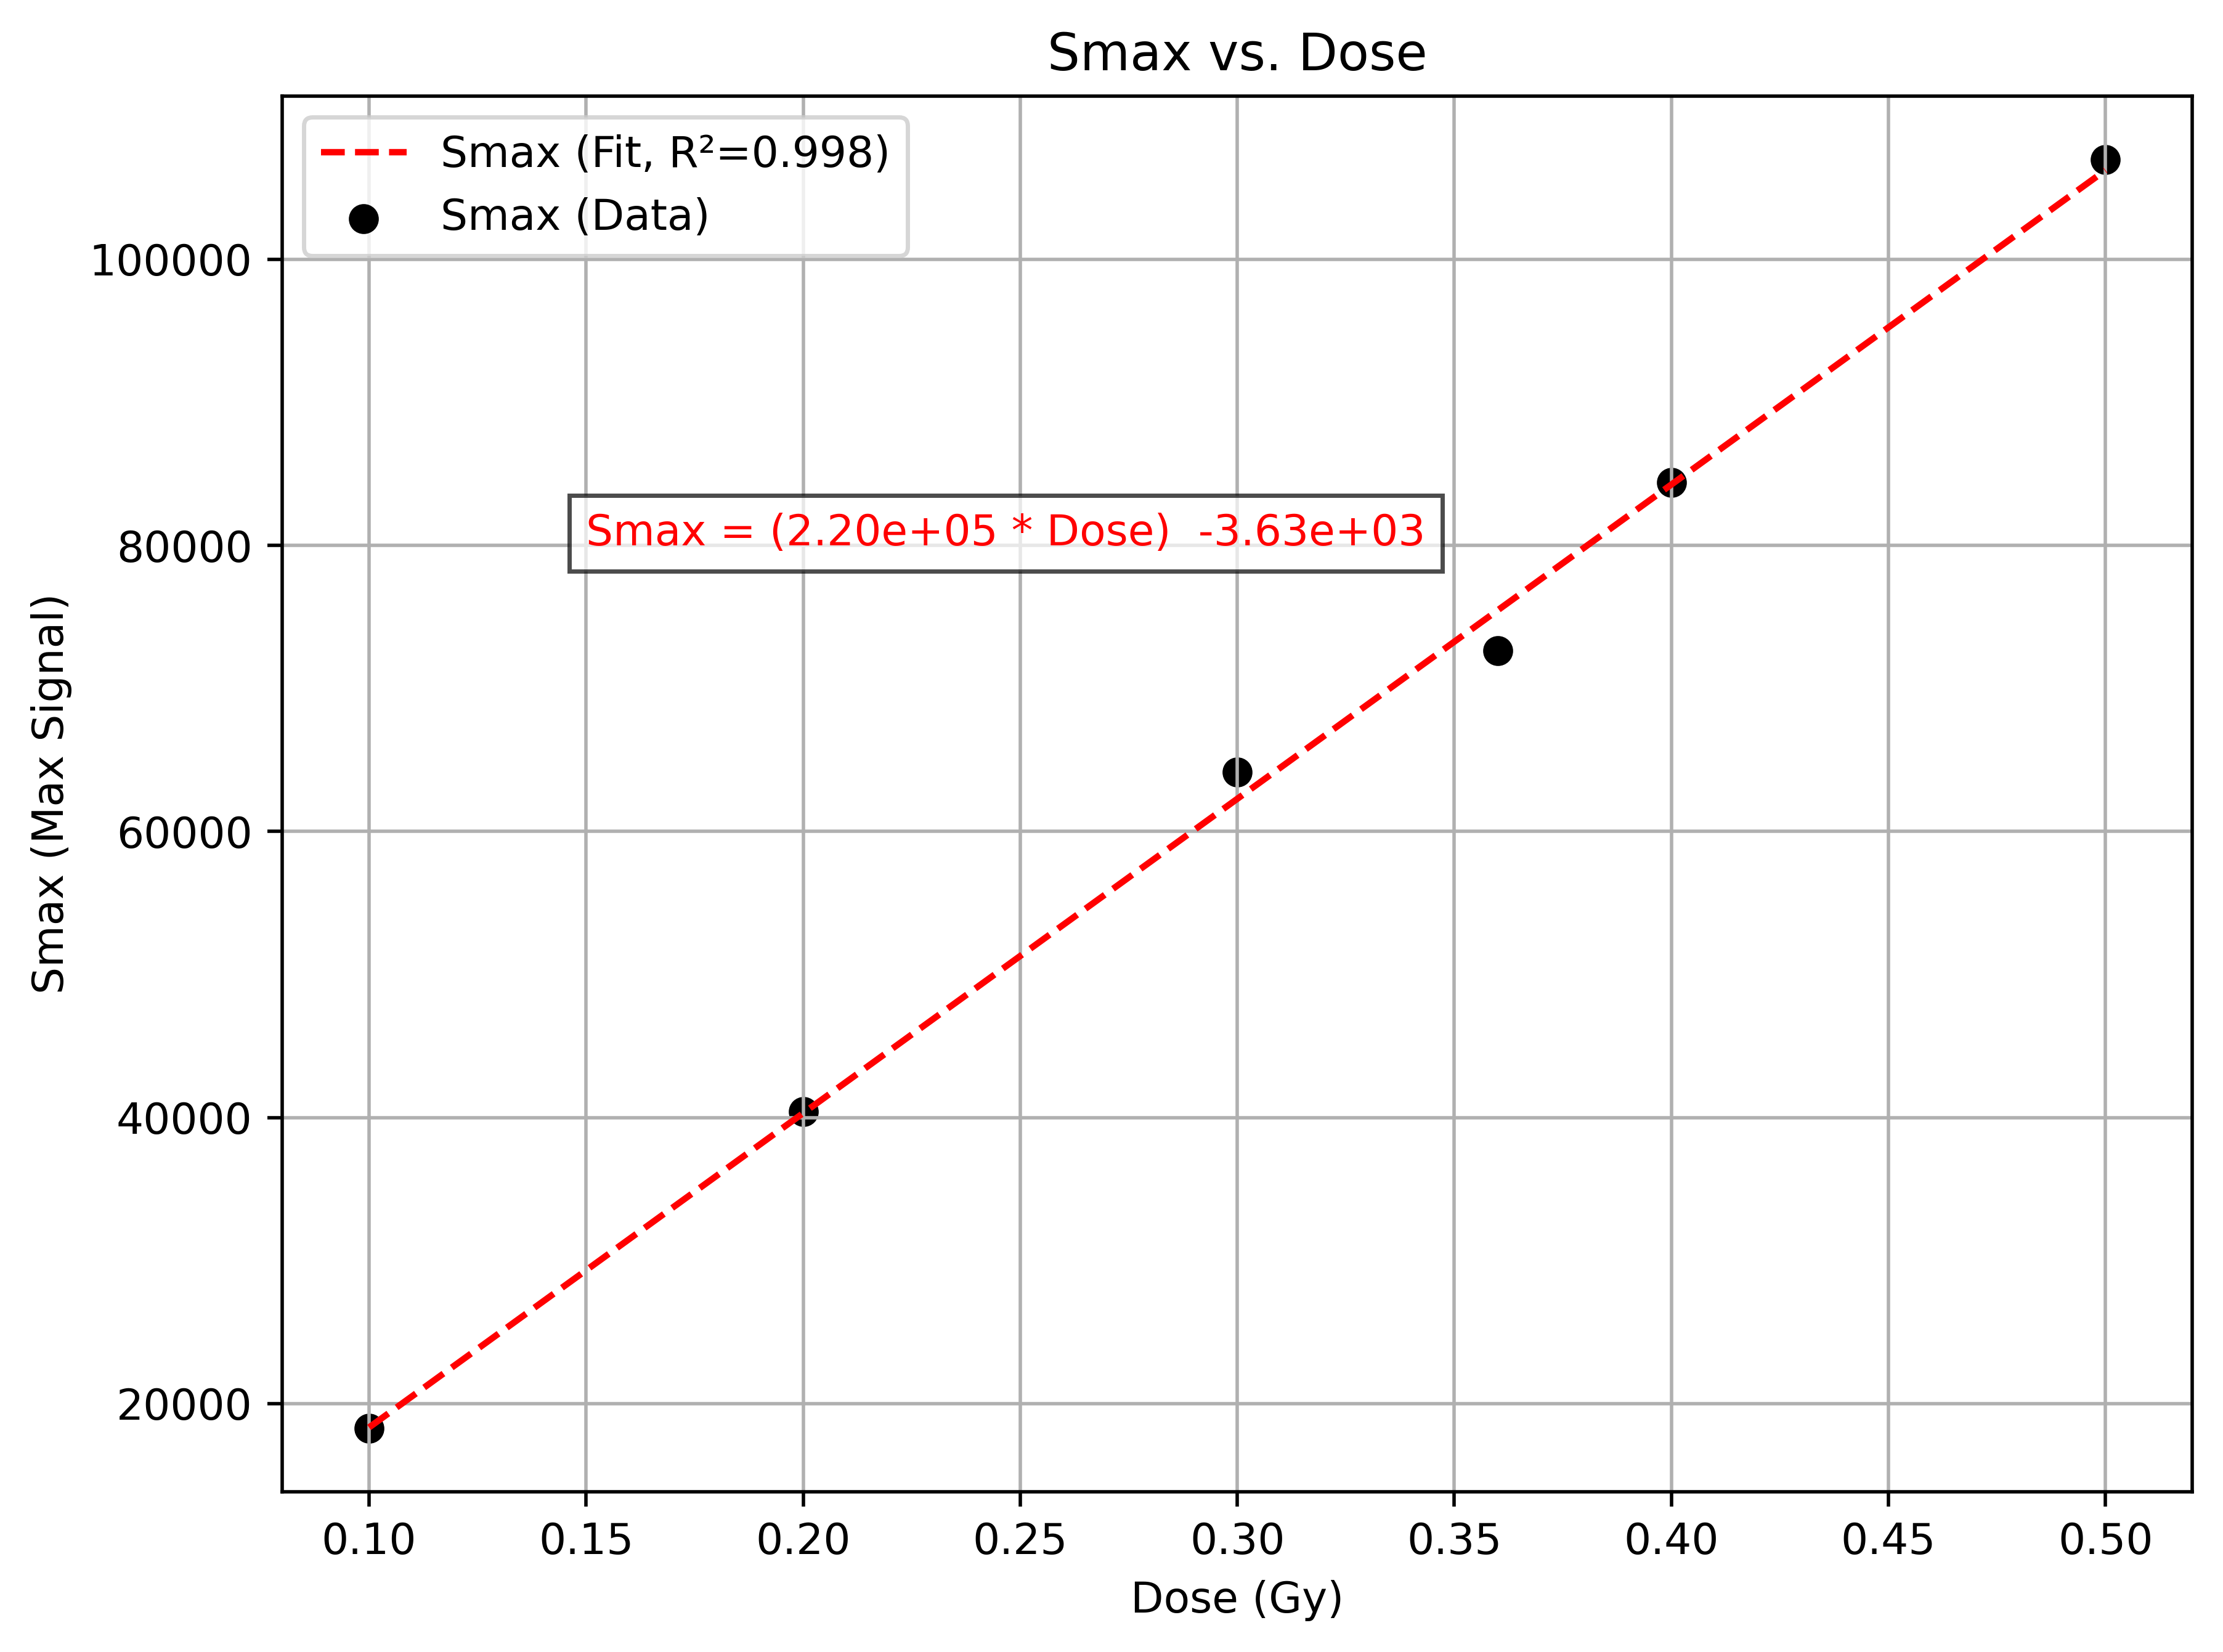

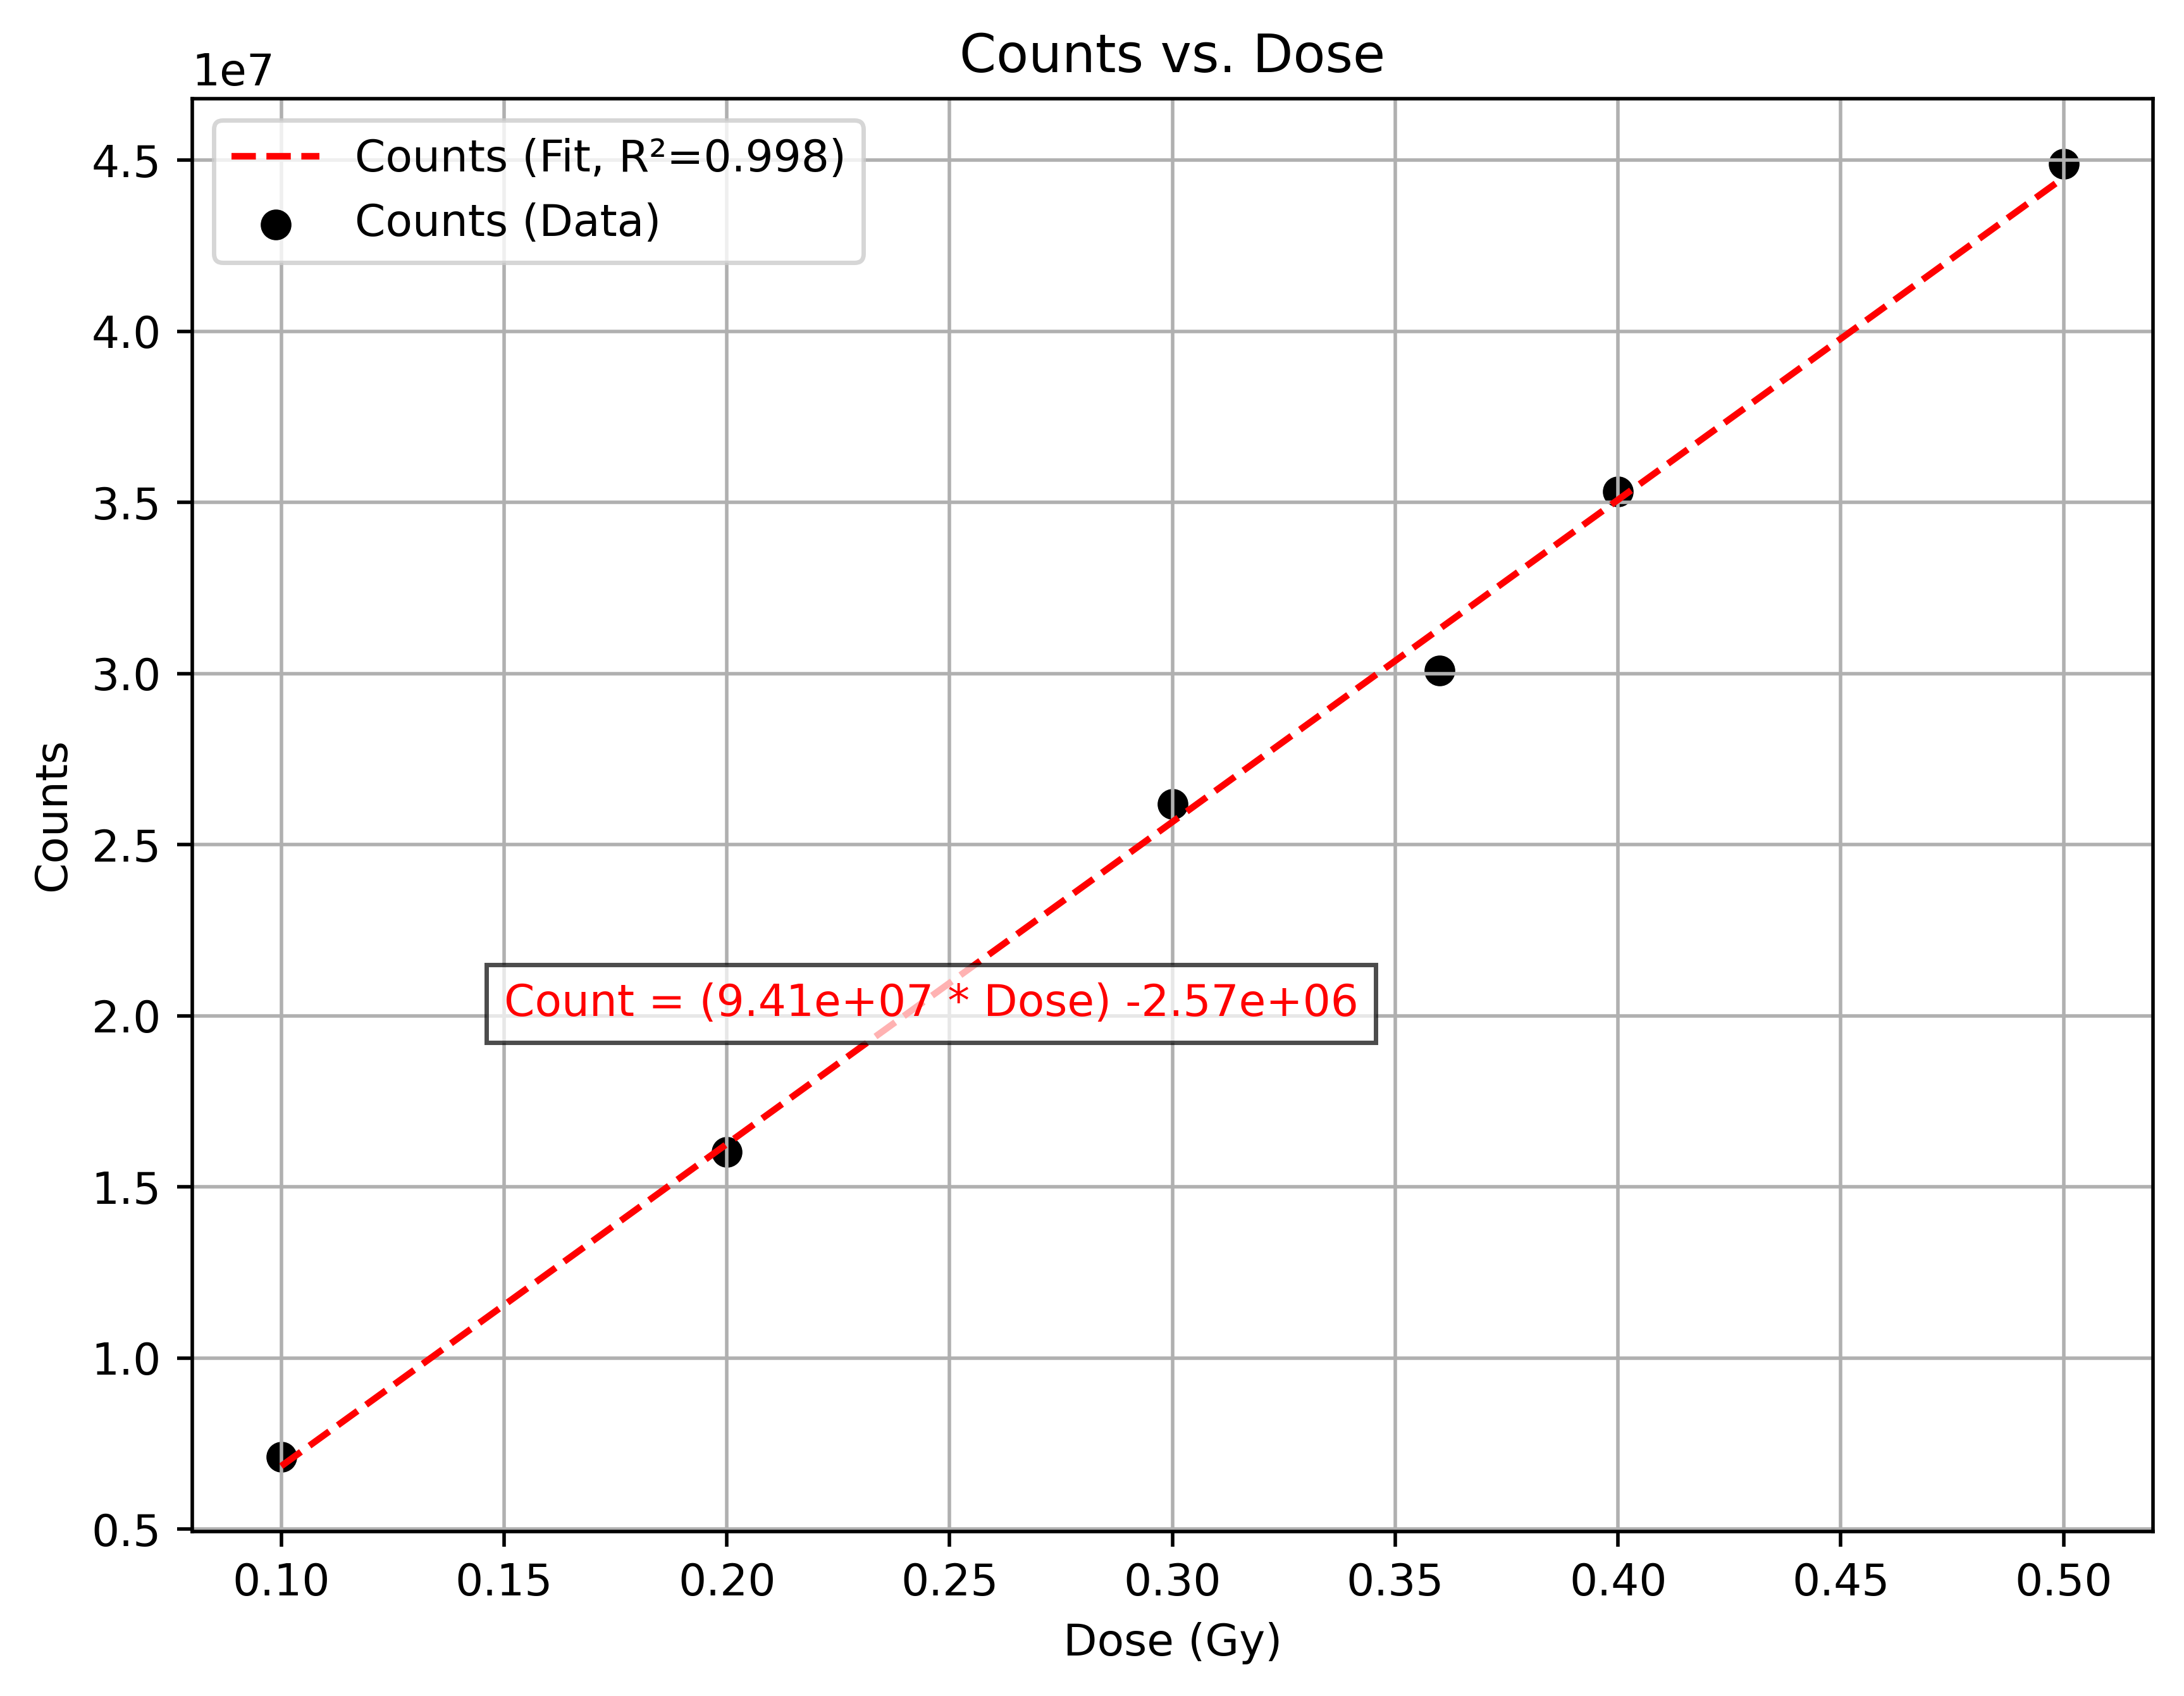

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data for part d
dose = np.array([0.1, 0.2, 0.3, 0.36, 0.4, 0.5])  # Gy
smax = np.array([18287, 40393, 64168, 72616, 84413, 106989])  # Max signal
count = np.array([7120586, 16024607, 26188485, 30093208, 35314277, 44900283])  # Counts

# Linear regression for Smax vs. Dose
smax_model = LinearRegression()
dose_reshaped = dose.reshape(-1, 1)
smax_model.fit(dose_reshaped, smax)
smax_pred = smax_model.predict(dose_reshaped)
r2_smax = r2_score(smax, smax_pred)

# Get regression line equation for Smax
smax_slope = smax_model.coef_[0]
smax_intercept = smax_model.intercept_
smax_eq = f"Smax = ({smax_slope:.2e} * Dose)  {smax_intercept:.2e}"

# Plot Smax vs. Dose
plt.figure(figsize=(8, 6))
plt.scatter(dose, smax, label="Smax (Data)", color="black")
plt.plot(dose, smax_pred, linestyle='--', color='red', label=f"Smax (Fit, R²={r2_smax:.3f})")
plt.text(0.15, 80000, smax_eq, color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.xlabel("Dose (Gy)")
plt.ylabel("Smax (Max Signal)")
plt.title("Smax vs. Dose")
plt.grid()
plt.legend()
plt.savefig("LiF_Smax.png")
plt.show()

# Linear regression for Counts vs. Dose
count_model = LinearRegression()
count_model.fit(dose_reshaped, count)
count_pred = count_model.predict(dose_reshaped)
r2_count = r2_score(count, count_pred)

# Get regression line equation for Counts
count_slope = count_model.coef_[0]
count_intercept = count_model.intercept_
count_eq = f"Count = ({count_slope:.2e} * Dose) {count_intercept:.2e}"

# Plot Count vs. Dose
plt.figure(figsize=(8, 6))
plt.scatter(dose, count, label="Counts (Data)", color="black")
plt.plot(dose, count_pred, linestyle='--', color='red', label=f"Counts (Fit, R²={r2_count:.3f})")
plt.text(0.15, 2e7, count_eq, color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
plt.xlabel("Dose (Gy)")
plt.ylabel("Counts")
plt.title("Counts vs. Dose")
plt.grid()
plt.legend()
plt.savefig("LiF_Counts.png")
plt.show()